En el aprendizaje automático, el sesgo y la varianza son dos conceptos fundamentales que describen el rendimiento y la capacidad de generalización de un modelo predictivo.

### 1. Sesgo y Varianza: Explicación didáctica

**Sesgo:**
El sesgo se refiere a la simplificación que hace un modelo respecto a la realidad. Un modelo con alto sesgo asume una forma demasiado simple para capturar la verdadera relación entre las características (features/entradas) y la variable objetivo (target/salidas). Esto puede llevar a que el modelo no capture patrones importantes y subestime la complejidad de los datos.

**Ejemplo didáctico:**
Imagina que estás intentando predecir el precio de las casas basado solo en su tamaño (área en metros cuadrados). Si utilizas un modelo lineal simple que solo considera el tamaño como predictor, es probable que tengas un sesgo alto, ya que ignoras otras variables importantes como la ubicación, el número de habitaciones, etc. El modelo lineal podría ser demasiado simplista para capturar la verdadera relación no lineal entre el tamaño y el precio de las casas.

**Varianza:**
La varianza se refiere a la sensibilidad de un modelo a pequeñas fluctuaciones en los datos de entrenamiento. Un modelo con alta varianza se ajusta muy bien a los datos de entrenamiento específicos, pero no generaliza bien a nuevos datos que no ha visto antes. Esto puede llevar a un sobreajuste (overfitting), donde el modelo captura el ruido en lugar de los patrones genuinos en los datos.

**Ejemplo didáctico:**
Siguiendo con el ejemplo anterior, si usas un modelo extremadamente complejo, como un árbol de decisión muy profundo, para predecir el precio de las casas basado en múltiples características (incluyendo el tamaño), podrías tener alta varianza. Este modelo podría ajustarse muy bien a los datos de entrenamiento, pero podría fallar al generalizar correctamente para nuevas casas que no se parecen a las del conjunto de entrenamiento.

### 2. Sesgo y Varianza: Explicación teórica

**Sesgo (bias):**
Desde el punto de vista teórico, el sesgo se relaciona con errores sistemáticos que se introducen al tratar de modelar una relación subyacente. Un modelo con sesgo alto no puede representar adecuadamente la complejidad de los datos subyacentes y tiende a subestimar o sobrestimar consistentemente la variable objetivo.

**Varianza:**
La varianza se refiere a la variabilidad del modelo según los datos de entrenamiento específicos. Un modelo con alta varianza se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos, lo que indica que es sensible a pequeñas fluctuaciones en el conjunto de entrenamiento.

### 3. Soluciones para sesgo y varianza

**Sesgo alto:**
Para reducir el sesgo, es necesario aumentar la complejidad del modelo. Esto puede incluir usar modelos más avanzados (como redes neuronales en lugar de modelos lineales) o agregar más características relevantes para capturar mejor la relación subyacente entre las variables de entrada y la variable objetivo.

**Varianza alta:**
Para reducir la varianza, se debe simplificar el modelo y evitar el sobreajuste. Esto puede lograrse utilizando menos características (si es posible), reduciendo la complejidad del modelo (como limitar la profundidad de los árboles de decisión), o utilizando técnicas de regularización para penalizar la complejidad del modelo durante el entrenamiento.

En resumen, encontrar un equilibrio entre el sesgo y la varianza es crucial para desarrollar modelos de aprendizaje automático que generalicen bien a nuevos datos. Identificar y ajustar estos aspectos ayuda a mejorar el rendimiento predictivo y la utilidad práctica de los modelos en aplicaciones del mundo real.

# **Continuando con el análisis de regresión lineal**

Supongamos que tenemos una base de datos donde tenemos dos variables Inversión Doméstica Privada Bruta (IDPB) de Estados Unidos, así como el Producto Interno Bruto (PIB). En nuestro caso el PIB se encuentra en millones de dolares (base 2000), y el IDPB se encuentra en miles de millones de dolares (base 2000).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statsmodels.api as sm


A continuación se muestra la informaición.

In [5]:
df = pd.read_csv('sample_data/inversion_domestica_privada_bruta_pib.csv')
df.head()

,año,idpb_mm,pib_m
0,1990,886.6,7112500
1,1991,829.1,7100500
2,1992,878.3,7336600
3,1993,953.5,7532700
4,1994,1042.3,7835500


Supongamos que deseamos ajustar un modelo:

$$\text{IDPB} = \beta_0 + \beta_1 \cdot \text{PIB}$$

En nuestro caso si deseamos ajustar nuestro modelo, podemos decidir ajustar el modelo con los datos tal y como están, o bien ajustar las escalas, para ello se usa el **factor de escala**, al cual llamaremos $w$, y lo ajustariamos del siguiente modo:

$$\text{IDPB}_i^{*} = w_1 \text{IDPB}_i$$

$$\text{PIB}_i^{*} = w_1 \text{PIB}_i$$

donde $w_1$ y $w_2$ pueden ser distintos.

Ahora si tenemos dos escalas una en miles de millones y otra en millones, podemos ajustar para que todas esten en miles de millones, simplemente tomadn $w_2 = \frac{1}{1000}$.




**¿Cómo hacemos esto?**

Primero hacemos nuestro diagrama de dispersión.

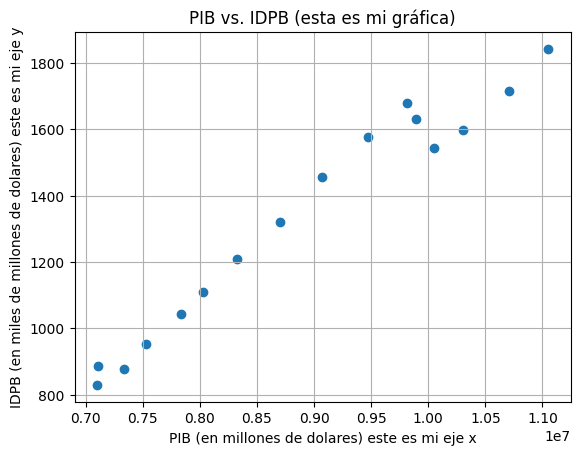

In [6]:
plt.title("PIB vs. IDPB (esta es mi gráfica)")
plt.scatter(df['pib_m'], df['idpb_mm'])
plt.grid(True)
plt.xlabel("PIB (en millones de dolares) este es mi eje x")
plt.ylabel("IDPB (en miles de millones de dolares) este es mi eje y")
plt.show()

In [7]:
df['pib_mm'] = df['pib_m'] / 1000
df.head()

,año,idpb_mm,pib_m,pib_mm
0,1990,886.6,7112500,7112.5
1,1991,829.1,7100500,7100.5
2,1992,878.3,7336600,7336.6
3,1993,953.5,7532700,7532.7
4,1994,1042.3,7835500,7835.5


In [8]:
df['idpb_m'] = df['idpb_mm'] * 1000
df.head()

,año,idpb_mm,pib_m,pib_mm,idpb_m
0,1990,886.6,7112500,7112.5,886600.0
1,1991,829.1,7100500,7100.5,829100.0
2,1992,878.3,7336600,7336.6,878300.0
3,1993,953.5,7532700,7532.7,953500.0
4,1994,1042.3,7835500,7835.5,1042300.0


Ahora, vamos a crear un modelo para ajustar nuestros datos utilizando mismas escalas, y veremos como se interpreta.


Creamos las variables

In [9]:
X = df['pib_mm']#.values
X = sm.add_constant(X)
y = df['idpb_mm']

In [11]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                idpb_mm   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.43e-11
Time:                        22:38:46   Log-Likelihood:                -88.772
No. Observations:                  16   AIC:                             181.5
Df Residuals:                      14   BIC:                             183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -926.0904    116.358     -7.959      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<ipython-input-12-48ae4db4222b>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


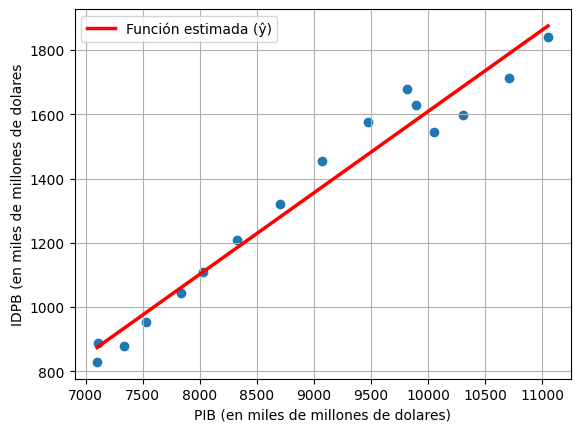

In [12]:
x_lin = np.linspace(df['pib_mm'].min(), df['pib_mm'].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.scatter(df['pib_mm'], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("PIB (en miles de millones de dolares)")
plt.ylabel("IDPB (en miles de millones de dolares")
plt.show()

***

In [13]:
results.params

,0
const,-926.090395
pib_mm,0.253524


$$\text{IDPB} = -926.090395 + 0.253524 \cdot \text{PIB}$$


Ahora, ¿cómo interpretamos estos resultados?


En nuestro caso $\beta_1$ es el parámetro del PIB medido en miles de millones de dolares. Ahora si consideramos que $\beta_1$ es una tasa de cambio, esta se mide como una razón de cambio:

$$\frac{\text{Unidades de la variable dependiente (salida)}}{\text{Unidades de la variable explicativa (entrada)}}$$

Asi en nuestra regresión, como la unidad esta en miles de millones, si el PIB cambia $1,000$ millones de dolares, la IDPB cambia en promedio 0.2535 miles de millones de dolares, veamos

Ahora, ¿cómo se interpreta a $\beta_1$?


**Interpretación del coeficiente para la variable medida en miles de millones (mm):**
   - Si el coeficiente asociado a la inversión privada (IDPB en miles de millones) también es 0.25, significa que, manteniendo todas las demás variables constantes, un incremento de 1 mil millones de dólares en la inversión privada predice un aumento de 0.25 unidades en el PIB medido en miles de millones de dólares (PIB_mm).
   - En este caso, un aumento de 1 mil millones de dólares en la inversión privada está asociado con un aumento de 0.25 miles de millones de dólares en el PIB.

In [14]:
def separar_centenas(numero):
  """Esta función separa las sentenas"""
  numero_formatado = "{:,}".format(numero)
  return numero_formatado


In [15]:
cantidad = 1000000000
print(separar_centenas(cantidad))

1,000,000,000


In [16]:
results.params

,0
const,-926.090395
pib_mm,0.253524


In [17]:
results.params[1]

<ipython-input-17-7bda7dbecd55>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1]


0.25352403499699017

In [18]:
print(separar_centenas(cantidad*results.params[1]))

253,524,034.99699017


<ipython-input-18-9cb10983d589>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(separar_centenas(cantidad*results.params[1]))


Otra vía de interpretar el problema.

In [19]:
numero = 1

print(separar_centenas(numero))

print(separar_centenas(numero*0.2535))

1
0.2535


Tambień se puede expresar en otras palabras, por cada dolar que aumenta el PIB, el IDPB aumenta el 0.25 centavos de dolar.


Ajustando el modelo en millones de dolares.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-20-776ac1c47ced>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


                            OLS Regression Results                            
Dep. Variable:                 idpb_m   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.43e-11
Time:                        22:58:30   Log-Likelihood:                -199.30
No. Observations:                  16   AIC:                             402.6
Df Residuals:                      14   BIC:                             404.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.261e+05   1.16e+05     -7.959      0.0

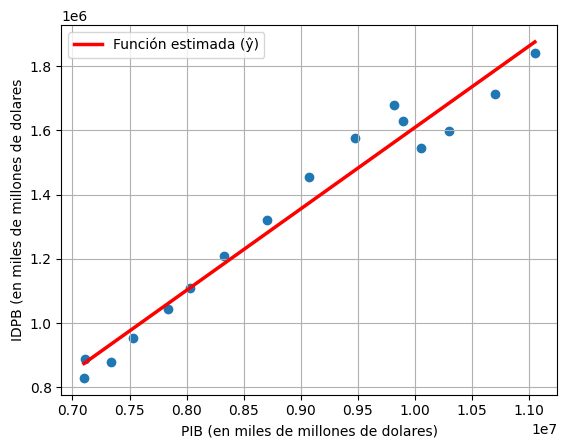

In [20]:
X = pd.DataFrame({'pib_m': df['pib_m']})#.values
X = sm.add_constant(X)
y = df['idpb_m']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

x_lin = np.linspace(df['pib_m'].min(), df['pib_m'].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.scatter(df['pib_m'], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("PIB (en miles de millones de dolares)")
plt.ylabel("IDPB (en miles de millones de dolares")
plt.show()

**Interpretación del coeficiente para la variable medida en millones (m):**
   - Si el coeficiente asociado al PIB es 0.25, significa que, manteniendo todas las demás variables constantes, un incremento de 1 millón de dólares en la inversión privada predice un aumento de 0.25 unidades en la inversión.
   - Por lo tanto, un aumento de 1 millón de dólares en PIB está asociado con un aumento de 0.25 millones de dólares en la inversión.

Como se puede observar, dependiendo de la escala, se interpretan los cambios en las $\beta$'s.

***

**Ahora, supongamos que hacemos una regresión sobre variables estandarizadas.**

A menudo escalar las variables en un modelo de aprendizaje automático, puede ayudar a los algoritmos de aprendizaje a ajustar los modelos de manera más fácil y dar mejor rendimiento, pero la interpretabildiad de datos escalados cambia, veamos.

Supongamos que realizaremos un escalamiento utilizando las siguientes ecuaciones.

$$Y_i^{*} = \frac{Y_i - \bar{Y}}{S_Y}$$
$$X_i^{*} = \frac{X_i - \bar{X}}{S_X}$$

donde $\bar{Y}$ es la media del conjunto de datos $Y$, $Y_i$ es el valor que se escala; $S_Y$ es la desviación estándar de la base de datos de $Y$, $\bar{X}$ es la media del conjunto de datos $X$, $X_i$ es el valor que se escala; $S_X$ es la desviación estándar de los datos de $X$.

Cuando sae estandaríza una variable utilizando estás ecuaciones, hacemos que la media sea igual a cero y la desviación estándar sea 1.

**Ahora, ¿cómo se interpretan los datos?**

Cuando se estandarizan los datos utilizando la desviación estándar, ahora cuando se presenta un cambio, se habla en unidades de desviación estándar, veamos.

Primero escalamos

In [21]:
X = pd.DataFrame({'pib_m': df['pib_m']})#.values
# X = sm.add_constant(X)
y = df['idpb_m']

$$\text{IDPB} = \beta_1 \cdot \text{PIB}$$


Pregunta: ¿por qué creen que en este modelo no se agrega la constante?  
R: Como se estandarizaron los datos y su media ahora es cero por lo cual los datos ya estan centrados alrededor de cero ya no es necesario agregar el intercepto

In [22]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler() # Creamos el objeto escalador.

scaler_X.fit(X) # Ajustamos nuestros datos con los datos de entrada. Tomar la media y desviación estándar.

scaler_Y = StandardScaler() # Creamos el escalador para datos de salida.


In [23]:
y.values.shape, y.values.reshape(-1, 1).shape

((16,), (16, 1))

In [24]:
y.values.reshape(-1, 1)

array([[ 886600.],
       [ 829100.],
       [ 878300.],
       [ 953500.],
       [1042300.],
       [1109600.],
       [1209200.],
       [1320600.],
       [1455000.],
       [1576300.],
       [1679000.],
       [1629400.],
       [1544600.],
       [1596900.],
       [1713900.],
       [1842000.]])

In [25]:
scaler_Y.fit(y.values.reshape(-1, 1)) #  Tomar la media y desviación estándar.

StandardScaler()

Transformamos los datos

In [26]:
X_scaled = scaler_X.transform(X)
y_scaled = scaler_Y.transform(y.values.reshape(-1, 1))

Reviso las dimensiones

In [27]:
X_scaled.shape, y_scaled.shape

((16, 1), (16, 1))

**Hagamos el modelo utilizando la constante**

Creo los DataFrames para cada una de mis variables, con el objetivo de que al pasarlas por ajuste de datos, me salga el nombre de las variables.

In [28]:
X = pd.DataFrame(data=X_scaled, columns=['pib_scaled'])
X.head()

,pib_scaled
0,-1.390054
1,-1.399409
2,-1.215346
3,-1.062468
4,-0.826406


In [29]:
X = sm.add_constant(X)

In [30]:
y = pd.DataFrame(data=y_scaled, columns=['idpb_scaled'])

In [31]:
y

,idpb_scaled
0,-1.336658
1,-1.510330
2,-1.361727
3,-1.134593
4,-0.866382
5,-0.663109
6,-0.362278
7,-0.025806
8,0.380136
9,0.746510


Ajustamos el modelo.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-32-f0f2f35805f4>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


                            OLS Regression Results                            
Dep. Variable:            idpb_scaled   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     383.5
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.43e-11
Time:                        23:13:17   Log-Likelihood:                 4.0655
No. Observations:                  16   AIC:                            -4.131
Df Residuals:                      14   BIC:                            -2.586
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.551e-17      0.050  -1.11e-15      1.0

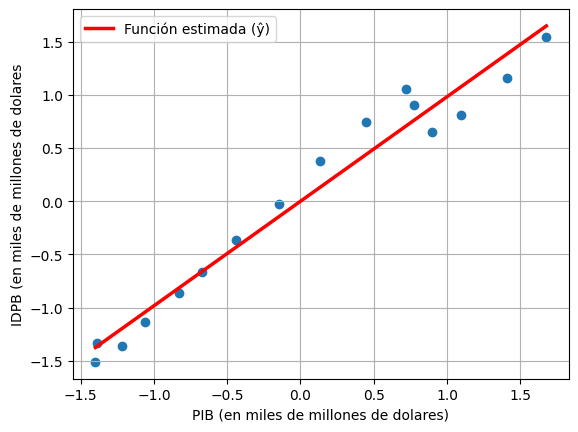

In [32]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

x_lin = np.linspace(X['pib_scaled'].min(), X['pib_scaled'].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.scatter(X['pib_scaled'], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("PIB (en miles de millones de dolares)")
plt.ylabel("IDPB (en miles de millones de dolares")
plt.show()

Antes de continuar con la interpretación, se puede obervar que la constante no es estadisticamente sifnificativa, ¿por qué?  
R: Por lo mismo que dijimos anteriormente, como se estandarizaron los datos y quedaron con media igual a cero estan centrados en torno a cero, por lo cual el intercepto ya no tiene tanto uso.  
Ahora reajustamos el modelo pero sin la constante.

df

In [33]:
df.head()

,año,idpb_mm,pib_m,pib_mm,idpb_m
0,1990,886.6,7112500,7112.5,886600.0
1,1991,829.1,7100500,7100.5,829100.0
2,1992,878.3,7336600,7336.6,878300.0
3,1993,953.5,7532700,7532.7,953500.0
4,1994,1042.3,7835500,7835.5,1042300.0


In [34]:
X = pd.DataFrame(data=X_scaled, columns=['pib_scaled'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-35-529f597339bd>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] * x


                                 OLS Regression Results                                
Dep. Variable:            idpb_scaled   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              410.9
Date:                Sun, 18 Aug 2024   Prob (F-statistic):                    2.60e-12
Time:                        23:19:23   Log-Likelihood:                          4.0655
No. Observations:                  16   AIC:                                     -6.131
Df Residuals:                      15   BIC:                                     -5.358
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

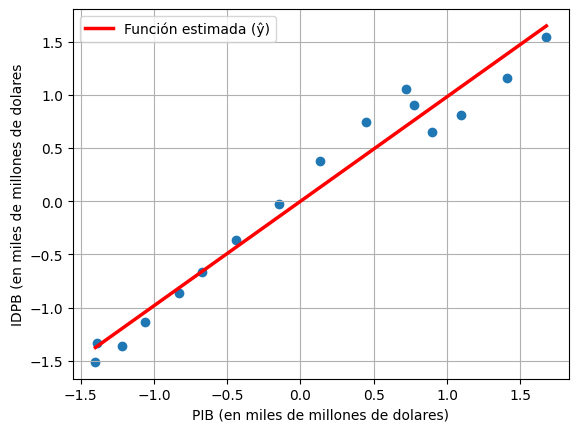

In [35]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

x_lin = np.linspace(X['pib_scaled'].min(), X['pib_scaled'].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] * x
y_hat = f(x_lin)


plt.scatter(X['pib_scaled'], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("PIB (en miles de millones de dolares)")
plt.ylabel("IDPB (en miles de millones de dolares")
plt.show()

$$inversion = 0.9822 \cdot PIB$$

In [36]:
std = df['pib_m'].std()
std

1324783.0025926258

In [38]:
std*0.9822

1301201.865146477

¿cómo lo interpretamos?

Esta es la interpretación, cuando el PIB estandarizado aumenta en una desviación estándar, en promedio, el IDPB aumenta en 0.98 desviaciones estándar.

Una gran ventaja de usar la estandarización, es que se puede trabajar con mayor facilidad el trabajar con modelos de regresión multiple donde las variables de entrada tienen diferentes escalas.

**Formas funcionales del modelo de regresión**

 - Modelo log-line.
 - Modelo semilogarítmicos.
 - Modelo recríprocos.

**Modelo log-line**

También conocido como log-log, doble-log.
Tenemos la siguiente ecuación.

$$Y_i = \beta_{1}X_{i}^{\beta_2}e^{u_i}$$

La cual no tiene una forma lineal, por lo cual si le aplicamos una transformación, podemos obtener una función lineal.

La linealización de una función implica transformarla en una forma lineal, lo que puede facilitar su análisis y estimación de parámetros. En el caos de la siguiente ecuación:

$$Y_i = \beta_{1}X_{i}^{\beta_2}e^{u_i}$$

Si aplicamos el logaritmo natural (ln) a ambos lados de la ecuación, obtenemos:

$$\ln(Y_i) = \ln(\beta_{1}X_{i}^{\beta_2}e^{u_i})$$

Usando las propiedades de los logaritmos, podemos reescribir esta expresión como:

$$\ln(Y_i) = \ln(\beta_{1}) + \ln(X_{i}^{\beta_2}) + \ln(e^{u_i})$$

$$\ln(Y_i) = \ln(\beta_{1}) + \beta_{2}\ln(X_{i}) + u_i$$

Ahora, si definimos:

$$\ln(Y_i) = Y^*$$
$$\ln(X_{i}) = X^*$$

La ecuación se convierte en:

$$Y^* = \ln(\beta_{1}) + \beta_{2}X^* + u_i$$

Esta es una forma lineal de la ecuación original. Por lo tanto, al aplicar una transformación logarítmica, hemos linealizado la relación entre $Y$ y $X$, lo que facilita la interpretación y el análisis de los datos. Es válido hacer esto bajo ciertas condiciones, como que $X$ e $Y$ sean positivos.

In [40]:
from sympy import Symbol, log, symbols, exp, Eq, ln, expand_log


Yi, beta1, Xi, beta2, ui = symbols('Y_i beta_1 X_i beta_2 u_i')

# Definir la expresión
expresion = Eq(Yi, beta1 * Xi**beta2 * exp(ui))

# Imprimir la expresión
expresion

Eq(Y_i, X_i**beta_2*beta_1*exp(u_i))

In [41]:
# Aplicar el logaritmo natural a ambos lados de la ecuación original
ecuacion_logaritmica = Eq(ln(expresion.lhs), ln(expresion.rhs))

# Imprimir la ecuación logarítmica
ecuacion_logaritmica

Eq(log(Y_i), log(X_i**beta_2*beta_1*exp(u_i)))

Desarrollamos la ecuación y ahora tenemos una función lineal expresada en logaritmos.

In [42]:
# Expandir el logaritmo del lado derecho
ecuacion_logaritmica_expandida = expand_log(ecuacion_logaritmica, force=True)

# Imprimir la ecuación logarítmica expandida
ecuacion_logaritmica_expandida

Eq(log(Y_i), beta_2*log(X_i) + u_i + log(beta_1))

$$\ln(Y_i) = \ln(\beta_{1}) + \beta_{2}\ln(X_{i}) + u_i$$

La ventaja de usar el modelo log-log, es que perimente que la elasticidad siempre sea la  misma (por ello se puede conocer este modelo como modelo de elasticidad constante) desde donde se mida, como se puede mostrar en la siguiente imagen.

Nota: Elasticidad: La elasticidad de $Y$ respecto de $X$ es el cambio procentual en $Y$, ante un pequeño cambio porcentual de $X$. En el caso de nuestra ecuación $\beta_2$ es el coeficiente de elasticidad.

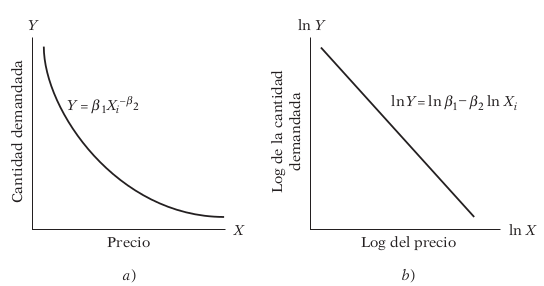

(Imagen tomada de Gujarati, 2009)

Ahora usaremos esta ecuación con la siguiente base de datos.
Sobre el gasto personal total de Estados Unidos y categorías (medido en miles de millones de dólares en base 2000 ajustados por la inflación; datos trimestrales con tasas anuales ajustadas por estacionalidad)

Variables
 - GASERV: Gasto en servicios (miles de millones de dólares de 2000).
 - GASBD: Gasto en bienes duraderos (miles de millones de dólares de 2000).
 - GASBPER: Gasto en bienes perecederos (miles de millones de dólares de 2000).
 - GCPERT: Gasto de consumo personal total (miles de millones de dólares de 2000).

In [44]:
gasto = pd.read_csv("sample_data/gasto_persona_categorias.csv")
gasto.head()

,año_trimestre,gaserv,gasbd,gasbper,gcpert
0,2003-I,4143.3,971.4,2072.5,7184.9
1,2003-II,4161.3,1009.8,2084.2,7249.3
2,2003-III,4190.7,1049.6,2123.0,7352.9
3,2003-IV,4220.2,1051.4,2132.5,7394.3
4,2004-I,4268.2,1067.0,2155.3,7479.8


Nosotrs buscamos estimar el siguiente modelo:

$$\ln(\hat{Y_i}) = \ln(\hat{\beta_{1}}) + \hat{\beta_{2}}\ln(X_{i})$$

Pero sobre el gasto en bienes duraderos, usando como variable de entrada el gasto total.

$$\ln(\widehat{\text{gasto en bienes duraderos}}) = \ln(\hat{\beta_{1}}) + \hat{\beta_{2}}\ln(\text{gasto total})$$

usando el nombre de las variables de nuestro conjunto de datos:

$$\ln(\widehat{\text{gasbd}}) = \ln(\hat{\beta_{1}}) + \hat{\beta_{2}}\ln(\text{gcpert})$$

Antes de linealizar, observemos el comportamiento de nuestros datos.

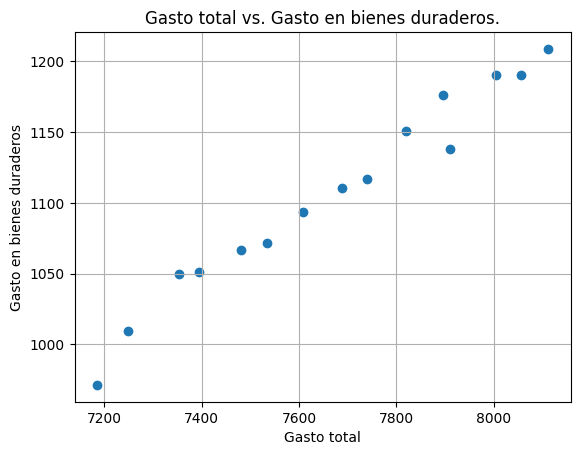

In [45]:
plt.title('Gasto total vs. Gasto en bienes duraderos.')
plt.scatter(gasto['gcpert'], gasto['gasbd'])
plt.grid(True)
plt.xlabel("Gasto total")
plt.ylabel("Gasto en bienes duraderos")
plt.show()

Ahora aplicando el logaritmo, ¿Qué diferencias notan?

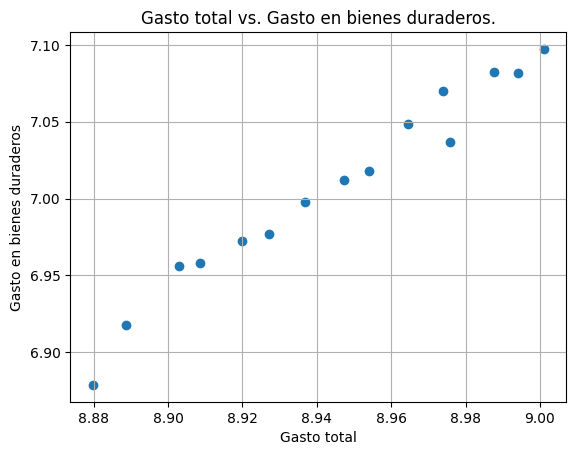

In [46]:
plt.title('Gasto total vs. Gasto en bienes duraderos.')
plt.scatter(np.log(gasto['gcpert']), np.log(gasto['gasbd']))
plt.grid(True)
plt.xlabel("Gasto total")
plt.ylabel("Gasto en bienes duraderos")
plt.show()

In [48]:
X = np.log(gasto['gcpert'])
X = sm.add_constant(X)
display(X.head())
y = np.log(gasto['gasbd'])

y

,const,gcpert
0,1.0,8.879737
1,1.0,8.888660
2,1.0,8.902850
3,1.0,8.908465
4,1.0,8.919961


,gasbd
0,6.878738
1,6.917508
2,6.956164
3,6.957878
4,6.972606
5,6.976721
6,6.997505
7,7.012386
8,7.018223
9,7.048213


Ahora realicemos nuestra regresión lineal como lo hemos estado haciendo normalmente.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-50-23621b15203e>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


                            OLS Regression Results                            
Dep. Variable:                  gasbd   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     412.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.12e-11
Time:                        00:09:33   Log-Likelihood:                 46.577
No. Observations:                  15   AIC:                            -89.15
Df Residuals:                      13   BIC:                            -87.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5417      0.716    -10.531      0.0

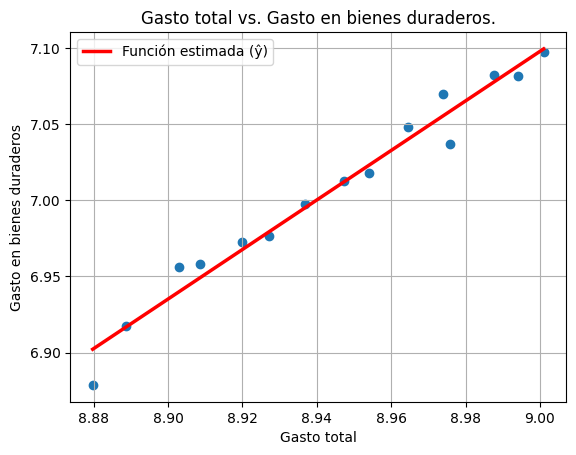

In [50]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

x_lin = np.linspace(X['gcpert'].min(), X['gcpert'].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.title('Gasto total vs. Gasto en bienes duraderos.')
plt.scatter(X['gcpert'], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("Gasto total")
plt.ylabel("Gasto en bienes duraderos")
plt.show()

$$\text{gasto en bienes duraderos } = -7.5417 + 1.6266 \cdot \text{el gasto total}$$

"*Como muestran estos resultados, la elasticidad de GASBD respecto de GCPERT es de casi 1.63, lo que indica que si el gasto personal total aumenta 1%, en promedio, el gasto en bienes duraderos se incrementará casi 1.63%. En consecuencia, el gasto en bienes duraderos es muy sensible a los cambios en el gasto de consumo personal. Por esta razón, los productores de bienes duraderos siguen muy de cerca los cambios en el ingreso personal y el gasto de consumo personal.*" (Gujarati, 2009)

**Modelos semilogarítmicos**

 - log-line.
 - lin-lig.


Supongamos que ustedes trabajan para el gobierno y quieren conocer la tasa de crecimiento del Producto Interno Bruto (PIB), o que trabajan para alguna empresa y quieren concoer la tasa de crecimiento de la oferta monetaria, o la tasa de crecimiento de la productividad, o empleo.


¿cómo podemos realizar esta estimación?

 Para poener un ejemplo, supongamos que deseamos saber la tasa de crecimineto del consumo personal. Nosotros podemos hacer un modelo considerando una regresión sobre el tiempo de la siguiente manera. Para ello usaremos la ecuación del interés compuesto:

 $$Y_{t} = Y_{0} (1 + r)^{t}$$

 donde $Y_t$ es la variable $Y$ en el periodo $t$ y Y_{0} la variable $Y$ en el periodo anterior.

 Aplicamos el logaritmo a la ecuación y tenemos lo siguiente:

 $$ ln (Y_{t}) = ln ( Y_{0}) + t \cdot ln (1 + r)$$

 ahora, con:

 $$\beta_1 = Y_{0}$$

 y

 $$\beta_2 = ln (1 + r)$$

reescribimos:

 $$ln(Y_{t}) = \beta_1 + \beta_2 \cdot t$$


Ahora, $\beta_{2}$ se interpreta de la siguiente manera:

 $$\beta_{2} = \frac{\text{cambio relativo en regresada}}{\text{cambio absoluto en la regresora}}$$


P. ej. si hay un cambio de una unidad, el efecto va a ser proporcional por el porcentaje queda la $\beta_{2}$.$

Esto se conoce como **semielasticidad**.

Nota: $\beta_{2}$ toma la siguiente forma:

$$\beta{2} = \frac{\frac{(Y_{t} - Y_{t-1})}{Y_{t-1}}}{(X_{t} - X_{t-1})}$$

En nuetro caso $X = t$

Vamos ahora ver el gasto en servicios.

In [51]:
list(range(0, len(gasto['gaserv'])))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

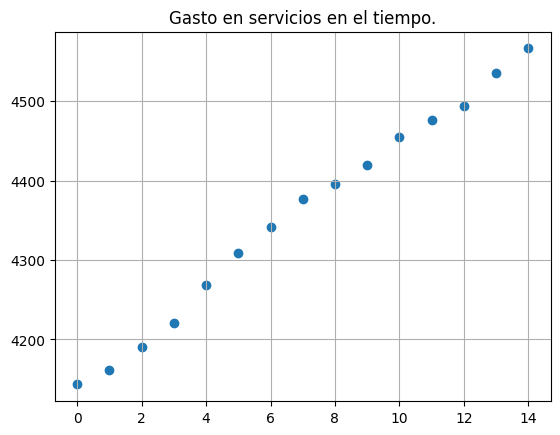

In [52]:
plt.title('Gasto en servicios en el tiempo.')
plt.scatter(range(0, len(gasto['gaserv'])), gasto['gaserv'])
plt.grid(True)
plt.show()

In [53]:
len(gasto['gaserv'])

15

In [54]:
# Cramos nuestra variable.
X = pd.DataFrame({'año': np.array(range(0, len(gasto['gaserv'])))})

In [55]:
X = sm.add_constant(X)
display(X)
y = np.log(gasto['gaserv'])

,const,año
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-56-e77aaedf9455>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


                            OLS Regression Results                            
Dep. Variable:                 gaserv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1597.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.42e-15
Time:                        00:56:28   Log-Likelihood:                 67.161
No. Observations:                  15   AIC:                            -130.3
Df Residuals:                      13   BIC:                            -128.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3297      0.001   5737.245      0.0

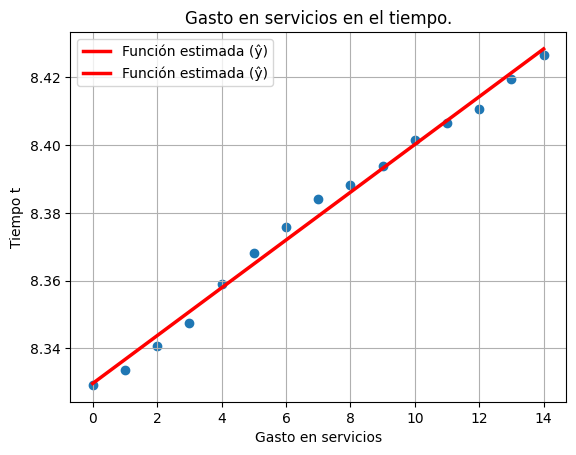

In [56]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



x_lin = np.linspace(X.min(), X.max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.title('Gasto en servicios en el tiempo.')
plt.scatter(X.iloc[:,1], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("Gasto en servicios")
plt.ylabel("Tiempo t")
plt.show()

In [57]:
results.params

,0
const,8.329681
año,0.007054


In [58]:
results.params[1]*100

<ipython-input-58-7953071d648b>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1]*100


0.7053667522889273

$$\text{gasto en servicios} = 8.32 + 0.007 \cdot \text{año}$$

**¿cómo se interpretan los resultados?**

El gasto en servicios en el periodo trimestral de 2003 a 2006 se incremiento a una tasa de $0.71\%$.

En este caso $\beta_{2}$ nos da un tasa de crecimiento instántanea (en un momento dado), ahor asi queremos obtener la compuesta, calculamos el antilogaritmo y le restamos uno:
$$e^{0.0071} - 1$$

¿Por qué se hace esto?

Nosotros sabemos que:

$$\beta_{2} = ln(1+r)$$

luego:

$$e^{\beta_{2}} = e^{ln(1+r)}$$

tenemos que:

$$e^{\beta_{2}} = 1 + r$$

y finalmente:

$$ r = e^{\beta_{2}} - 1$$

Esta ecuación se peude resolver usando `sympy` del siguiente modo.
Pero es más fáccil solo usar la siguiente ecuación:



$$ r = e^{\beta_{2}} - 1$$

In [59]:
import sympy as sp

# Paso 1: Definir la variable y la ecuación
r = sp.symbols('r')
equation = sp.Eq(0.0071, sp.ln(1+r))

# Paso 2: Resolver la ecuación
solution = sp.solve(equation, r)

# Paso 3: Mostrar la solución
print("La solución para r es:")
print(solution[0])


La solución para r es:
0.00712526475786587


Usando solo la ecuación:

$$ r = e^{\beta_{2}} - 1$$

In [60]:
import math

x = results.params[1]
antilog_x = math.exp(x)
# print("El antilogaritmo de", x, "es:", (antilog_x-1)*100, "%")
print(f"El antilogaritmo de {x:.4f} es: {(antilog_x-1)*100:.2f} %")

El antilogaritmo de 0.0071 es: 0.71 %


<ipython-input-60-fc771cbe3cad>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = results.params[1]


De este modo concluimos que la tasa de interes compuesto es $0.712\%$ ($r=0.00712$).

Ahora supongamos que queremos conocer la tendencia de nuestra variable gasto en servicios.
¿cómo lo hacemos?

Podemos hacer un modelo de tendencia lineal:

 $$Y_{t} = \beta_1 + \beta_2 \cdot t$$

en este modelo regresamos la variable absoluta sin ninguna transformación sobre el tiempo.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-61-f49aa79ea92e>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


                            OLS Regression Results                            
Dep. Variable:                 gaserv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1977.
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.37e-15
Time:                        01:09:59   Log-Likelihood:                -56.902
No. Observations:                  15   AIC:                             117.8
Df Residuals:                      13   BIC:                             119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4142.2183      5.674    729.995      0.0

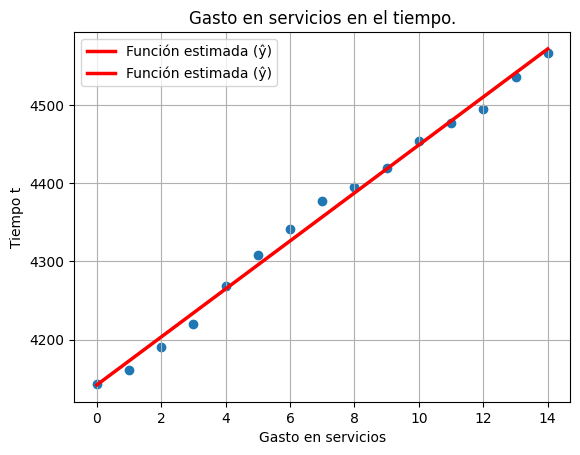

In [61]:
# Cramos nuestra variable.
X = pd.DataFrame({
    'año': np.array(range(0, len(gasto['gaserv'])))
})

X = sm.add_constant(X)
# display(X)
y = gasto['gaserv'] # no se aplica el logaritmo.

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



x_lin = np.linspace(X.min(), X.max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.title('Gasto en servicios en el tiempo.')
plt.scatter(X.iloc[:,1], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("Gasto en servicios")
plt.ylabel("Tiempo t")
plt.show()

En este caso, dado que la variable x es positiva, podemso decir que hay un crecimiento positivo del gasto. Y se podría decir que crece de manera absoluta unos 30 mil millones de dolares por trimestre.

Este modelo se conoce como modelo de tendencia lineal.

**Modelo lin-log**

Con este modelo podemos encontrar como cambia de manera absoluta $Y$ (salida), cuando hay un cambio porcentual en $X$ (entrada). Este modelo se escribe como sigue:

$$Y_{i} = \beta_{0} + \beta_{1} \cdot ln(X_{i}) + u_{i}$$

donde:
$$\beta_{2} = \frac{ \text{cambio en $Y$}}{\text{cambio en $ln(X)$}}= \frac{\text{cambio en $Y$}}{\text{cambio relativo en $X$}} = \frac{ \Delta Y}{ \frac{\Delta X}{X} } $$

Aplicamos el modelo para gastos en alimentación.

La siguiente base de datos se tomo de Gujarati (2009), la cual es una base de datos del gasto total y gasto en comida de familias en la India, esta base de datos muestra los montos en rubias.

In [63]:
gasto_comida = pd.read_csv('sample_data/gasto_comida_gasto_total.csv')
gasto_comida.head()

,gasto_alimento,gasto_total
0,217,382
1,196,388
2,303,391
3,270,415
4,325,456


Proponemos un modelo donde tomaremos la variable de entrada como el gasto total y la variable de salida el gasto en alimentos:

$$\text{gasto en alimentos} = \beta_{0} + \beta_{1} \cdot ln(\text{gasto total})$$

Primero definimos nuestras variables de entrada y de salida.

In [64]:
X = np.log(gasto_comida['gasto_total']) # Entrada aplicando el log.
X = sm.add_constant(X)
y = gasto_comida['gasto_alimento']

Creamos nuestro diagrama de dispersión

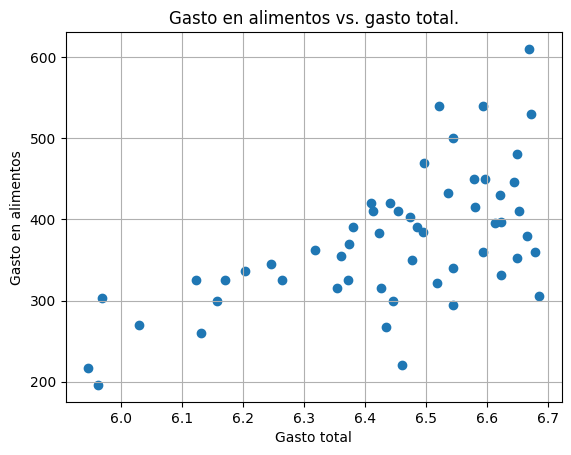

In [65]:
plt.title('Gasto en alimentos vs. gasto total.')
plt.scatter(X['gasto_total'], y)
plt.grid(True)
plt.ylabel("Gasto en alimentos")
plt.xlabel("Gasto total")
plt.show()

Ajustamos nuestro modelo

                            OLS Regression Results                            
Dep. Variable:         gasto_alimento   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     32.06
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           6.20e-07
Time:                        01:12:11   Log-Likelihood:                -307.85
No. Observations:                  55   AIC:                             619.7
Df Residuals:                      53   BIC:                             623.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1283.9120    292.810     -4.385      

<ipython-input-66-1f96aee8c9f0>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


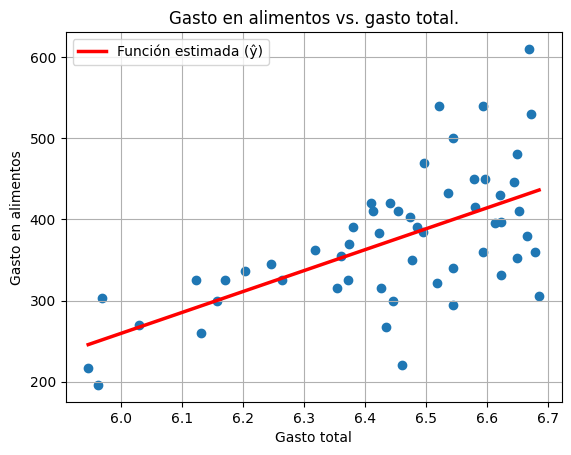

In [66]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



x_lin = np.linspace(X['gasto_total'].min(), X['gasto_total'].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.title('Gasto en alimentos vs. gasto total.')
plt.scatter(X['gasto_total'], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.ylabel("Gasto en alimentos")
plt.xlabel("Gasto total")
plt.show()

¿cómo se interpretan los datos?

In [67]:
results.params

,0
const,-1283.912044
gasto_total,257.270030


$$\text{gasto en alimentación} = -1283.91 + 257.27 \cdot log ( \text{gasto total})$$

$$\text{gasto en alimentación} = \beta_0 + \beta_1 \cdot log ( \text{gasto total}) + \beta_2 \cdot log( \text{ impuestos })$$

Primero tomamos el parametro de gasto total y lo dividimos entre 100:

$$ \frac{\beta_{2}}{100}$$



In [68]:
beta_gast_total_div = results.params[1] / 100
print(f"El beta de gasto total es: {beta_gast_total_div:.2f}")

El beta de gasto total es: 2.57


<ipython-input-68-906017dcedab>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_gast_total_div = results.params[1] / 100


Ahora si re cuerda, tenemos un valor absoluto dividido entre un valor porcentual:

$$\beta_{2} = \frac{ \text{cambio en $Y$}}{\text{cambio en $ln(X)$}}= \frac{\text{cambio en $Y$}}{\text{cambio relativo en $X$}} = \frac{ \Delta Y}{ \frac{\Delta X}{X} } $$

Esto nos está diciendo que por cada aumento de $1\%$ en el gasto total, las personas aumentan su gasto en comida en 2.57 rubias.

**Modelos recíprocos.**

Estos modelos tienen la siguiente forma.

$$Y_{i} = \beta_{1} + \beta_{2} \cdot ( \frac{1}{X_{i}} ) + u_{i}$$

Esto tiene diferentes efectos que se pueden observar en la siguiente imagen:

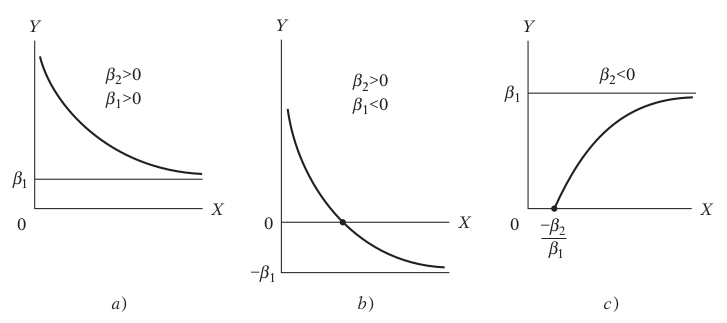

(Imagen tomada de Gujarati, 2009)

Esta transformación reciproba tiende a $0$ conforme $X$ crece, lo que hace que su comportamiento sea asintótico.

Para ver un ejemplo usaremos un base de datos que muestra el PIB percapita de 66 piases junto con las siguientes variables:

 - MI: mortalidad infantil, el número de defunciones de niños menores de 5 años en un año por cada 1 000 nacidos vivos.
 - TAF: tasa de alfabetismo femenina (porcentaje).
 - PIBPC: PIB per cápita en 1980.
 - TFT: tasa de fecundidad total, 1980-1985, cantidad promedio de hijos por
  mujer, con tasas de fecundidad para edades específicas en un año determinad.

La informaicón se tomó de Gujarati, (2009)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


fecundidad = pd.read_csv('sample_data/fecundidad.csv')
fecundidad.head()

,MI,TAF,PIBPC,TFT
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


Definimos nuestras variables sobre las que queremos hacer nuestra regresión; Y generamos un diagrama de dispersión de los datos.



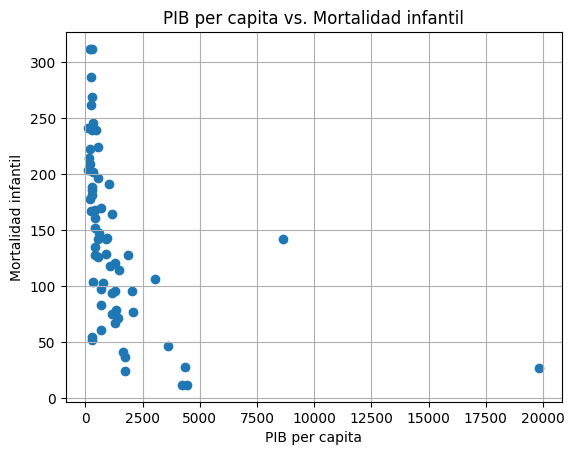

In [71]:
X = fecundidad['PIBPC']
y = fecundidad['MI']

plt.title("PIB per capita vs. Mortalidad infantil")
plt.xlabel("PIB per capita")
plt.ylabel("Mortalidad infantil")
plt.scatter(X, y)
plt.grid()
plt.show()

In [72]:
(1/X).shape, y.shape

((64,), (64,))

Cuando observamos esta imagen, se puede observar que si el PIBPC es menor, la mortalidad infantil aumenta, y conformaumenta disminuye, en el diagrama de disperción podemos observar que el último punto de la derecha esta en un mismo nivel que aquellos valores que se encuentran en $5000$, y tenemos un dato atípico entre $7500$ y $10,000$.

Ahora bien, esto podría hacernos pensar que la MI es inversamente proporcional al PIBPC, pero, ¿en que razón de cambio?, para ello proponemos un modelo.

**Modelo propuesto**

$$\text{Mortalidad infantil} = \beta_{0} + \beta_{2} \cdot (\frac{1}{\text{PIB per capita}})$$



Ahora hacemos la transformación correspondiente a nuestra variable de entrada del modelo.

In [73]:
def reciproco(x):
  return 1/x

reciproco(fecundidad['PIBPC'])

,PIBPC
0,0.000535
1,0.007692
2,0.003226
3,0.001754
4,0.000488
...,...
59,0.000680
60,0.003333
61,0.000275
62,0.004545


In [74]:
fecundidad['PIBPC'].apply(lambda x: 1/x)

,PIBPC
0,0.000535
1,0.007692
2,0.003226
3,0.001754
4,0.000488
...,...
59,0.000680
60,0.003333
61,0.000275
62,0.004545


In [75]:
X = fecundidad['PIBPC'].apply(lambda x: 1/x)
X = sm.add_constant(X)
y = fecundidad['MI']

Graficamos con nuestros datos transformados.

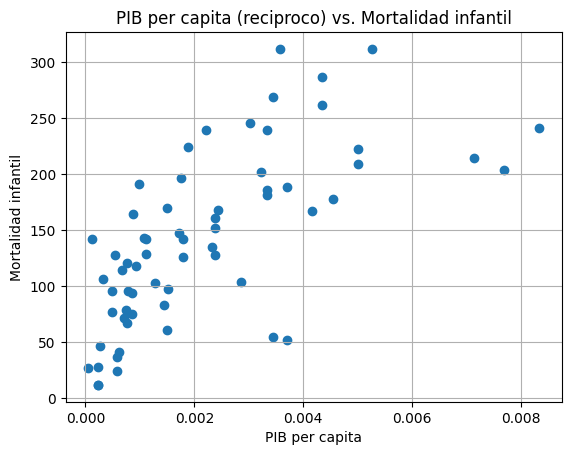

In [76]:
plt.title("PIB per capita (reciproco) vs. Mortalidad infantil")
plt.xlabel("PIB per capita")
plt.ylabel("Mortalidad infantil")
plt.scatter(X.iloc[:,1], y)
plt.grid(True)
plt.show()

La gráfica puede parecer algo capciosa en un inicio, pero del lado izquierdo del eje X, el lado de $0$, se encuentran los valores donde el PIB per capita es mayor, y del lado derecho, se encuentran los valores donde el PIB per capita es menor.

¿Por qué esto es así?  
R: Porque aplicamos la transformacion de inversa de los datos

In [77]:
X.shape, y.shape

((64, 2), (64,))

                            OLS Regression Results                            
Dep. Variable:                     MI   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           7.82e-10
Time:                        01:16:35   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7944     10.832      7.551      0.0

<ipython-input-78-44677cd7fa02>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


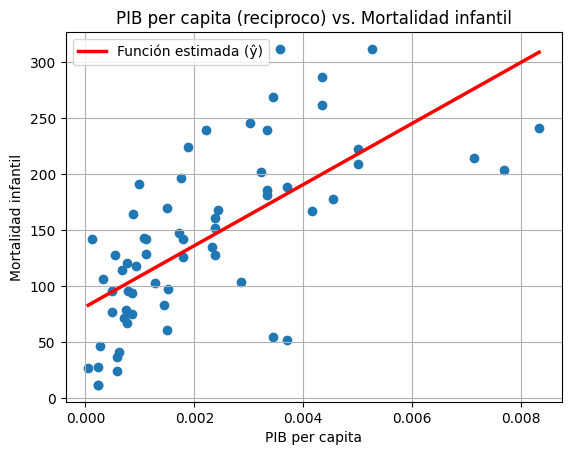

In [78]:


model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



x_lin = np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.title("PIB per capita (reciproco) vs. Mortalidad infantil")
plt.scatter(X.iloc[:,1], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("PIB per capita")
plt.ylabel("Mortalidad infantil")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     MI   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           0.000826
Time:                        01:16:48   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.4244      9.846     15.989      0.0

<ipython-input-79-ebb841bb4c7e>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x


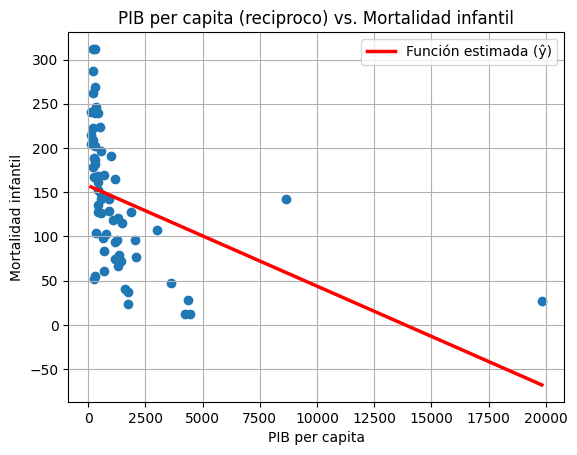

In [79]:
X = fecundidad['PIBPC']
X = sm.add_constant(X)
y = fecundidad['MI']
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())



x_lin = np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), 100)
# Usamos los parámetros para realizar una serie de puntos y generar la
# linea de nuestra predicción.
f = lambda x: results.params[0] + results.params[1] * x
y_hat = f(x_lin)


plt.title("PIB per capita (reciproco) vs. Mortalidad infantil")
plt.scatter(X.iloc[:,1], y)
plt.plot(x_lin, y_hat, c='r', label="Función estimada (ŷ)", linewidth=2.5)
plt.grid(True)
plt.legend()
plt.xlabel("PIB per capita")
plt.ylabel("Mortalidad infantil")
plt.show()

In [80]:
2.727e+04

27270.0

In [81]:
import sympy as sp

# Define los símbolos
X, beta0, beta1 = sp.symbols('X_i beta_0 beta_1')


**Modelo propuesto**

$$\text{Mortalidad infantil} = \beta_{0} + \beta_{2} \cdot (\frac{1}{\text{PIB per capita}})$$



In [82]:
# Define la función y
y = beta0 + beta1 * (1/X)
y

beta_0 + beta_1/X_i

In [83]:
# Calcula la derivada de y respecto a X
dydx = sp.diff(y, X)
dydx

-beta_1/X_i**2

In [84]:
def marginal_effect(x):
  return - results.params[1] / x**2
marginal_effect(1)

<ipython-input-84-fa95318dc109>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return - results.params[1] / x**2


0.011364453578257007

<ipython-input-84-fa95318dc109>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return - results.params[1] / x**2


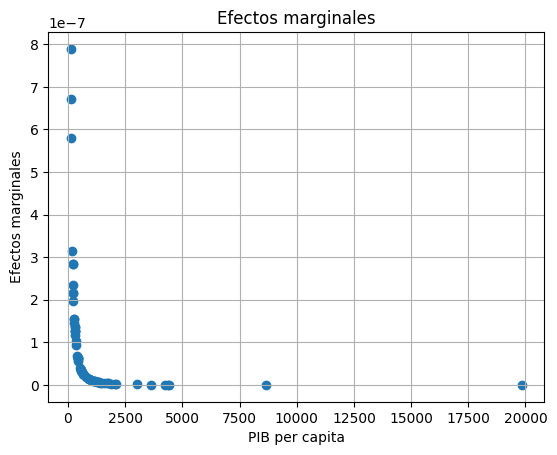

In [85]:
m_e = marginal_effect(fecundidad['PIBPC'])
plt.title("Efectos marginales")
plt.xlabel("PIB per capita")
plt.ylabel("Efectos marginales")
plt.scatter(fecundidad['PIBPC'], m_e)
plt.grid(True)
plt.show()

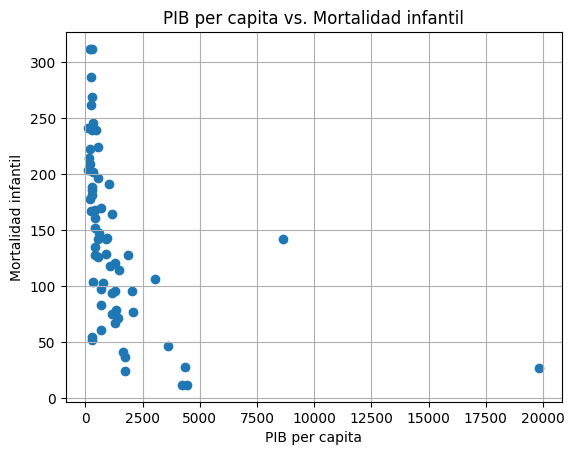

In [86]:
X = fecundidad['PIBPC']
y = fecundidad['MI']

plt.title("PIB per capita vs. Mortalidad infantil")
plt.xlabel("PIB per capita")
plt.ylabel("Mortalidad infantil")
plt.scatter(X, y)
plt.grid()
plt.show()

**Variables *Dummies***

Las bariables *dummies* es una una manera de pasear valores categoricos a valores númericos, p. ej. si deseamos saber en que estados los profesores tienen mayor o menor promedio salarial, podemos hacer una prueba de hipótesis, o podemos hacer una regresión lineal, haciendo uso variables *dummies*, veamos un ejmplo.

Tenemos la siguiente tabla de datos del salario promedio y el gasto por estado.

Información
 - d2 : 1 para estados del Noreste y Norte-centro; 0 para otra región.
 - d3 : 1 para estados del Sur; 0 para otra región.

Hojo aquí, tenemos tres zonas.
 1. Noreste y Norte-centro (21 estados en total)
 2. Sur (17 estados en total)
 3. Oeste (13 estados en total)

A pesar de que no tenemos una columna para Oeste, queda claro que si en d2 y d3 es cero, entonces el salario es para el caso Oeste.

In [87]:
salario = pd.read_csv('sample_data/salario_profesores.csv')
salario.tail()

,Estado,salario,gasto,d2,d3
46,New Mexico,42 780,42 780,0,0
47,Oregon,50 911,50 911,0,0
48,Utah,40 566,40 566,0,0
49,Washington D.C.,47 882,47 882,0,0
50,Wyoming,50 692,50 692,0,0


In [88]:
salario.dtypes

,0
Estado,object
salario,object
gasto,object
d2,int64
d3,int64


Ahora, proponemos nuestro modelo:

$$\text{salario promedio} = \beta_{0} + \beta_{1} \cdot \text{Salario Noreste} + \beta_{2} \cdot \text{Salario Sur}$$

Luego:

$$Y_i = \beta_{0} + \beta_{1} \cdot D_{2i} + \beta_{2} \cdot D_{3i}$$

¿Por qué solo ponemos dos variables?

In [89]:
def transform_data(x):
  x = str(x).replace(' ', '')

  return float(x)

In [90]:
float('2 200'.replace(' ', ''))

2200.0

In [91]:
salario.columns

Index(['Estado', 'salario', 'gasto', 'd2', 'd3'], dtype='object')

In [92]:
columns = salario.columns.drop('Estado')

for column in columns:
  salario[column] = salario[column].apply(transform_data)

In [93]:
salario.head()

,Estado,salario,gasto,d2,d3
0,Connecticut,60822.0,12436.0,1.0,0.0
1,Illinois,58246.0,9275.0,1.0,0.0
2,Indiana,47831.0,8935.0,1.0,0.0
3,Iowa,43130.0,7807.0,1.0,0.0
4,Kansas,43334.0,8373.0,1.0,0.0


In [94]:
salario.dtypes

,0
Estado,object
salario,float64
gasto,float64
d2,float64
d3,float64


In [95]:
salario.head()

,Estado,salario,gasto,d2,d3
0,Connecticut,60822.0,12436.0,1.0,0.0
1,Illinois,58246.0,9275.0,1.0,0.0
2,Indiana,47831.0,8935.0,1.0,0.0
3,Iowa,43130.0,7807.0,1.0,0.0
4,Kansas,43334.0,8373.0,1.0,0.0


In [96]:
X = salario[['d2', 'd3']]
X = sm.add_constant(X)

y = salario['salario']


model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.104
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.340
Time:                        01:20:47   Log-Likelihood:                -520.09
No. Observations:                  51   AIC:                             1046.
Df Residuals:                      48   BIC:                             1052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.801e+04   1857.204     25.853      0.0

$$\text{salario promedio} = \beta_{0} + \beta_{1} \cdot \text{Salario Noreste} + \beta_{2} \cdot \text{Salario Sur}$$

Luego:

$$Y_i = \beta_{0} + \beta_{1} \cdot D_{2i} + \beta_{2} \cdot D_{3i}$$

Es hora de interpretar si los coeficientes son estadísticamente significativos o no, y qué significa si lo son o no.

**Veamos otro ejemplo**

Con el Nivel Socioeconómico de las personas de León, Guanajuato.

In [98]:
nse_mujeres = pd.read_csv('sample_data/nse_mujeres.csv', index_col=0)
npse_homres = pd.read_csv('sample_data/nse_hombre.csv', index_col=0)
npse_homres['categoria'] = 'hombre'
nse_mujeres['categoria'] = 'mujer'
npse_homres['nse_score'] += 100
display(nse_mujeres.head())

display(npse_homres.head())

,nse_category,nse_score,categoria
0,A/B,266,mujer
3,C,152,mujer
5,A/B,224,mujer
7,A/B,216,mujer
14,A/B,240,mujer


,nse_category,nse_score,categoria
1,A/B,366,hombre
2,A/B,321,hombre
4,C,267,hombre
6,D+,215,hombre
8,A/B,374,hombre


In [99]:
nse = pd.concat([nse_mujeres, npse_homres], ignore_index=True)


In [100]:
nse.head()

,nse_category,nse_score,categoria
0,A/B,266,mujer
1,C,152,mujer
2,A/B,224,mujer
3,A/B,216,mujer
4,A/B,240,mujer


In [101]:
nse.tail()

,nse_category,nse_score,categoria
138,A/B,327,hombre
139,C,258,hombre
140,C,262,hombre
141,A/B,306,hombre
142,D+,199,hombre


Primero creamos un diagrama de violin para ver el comportamiento de los datos.

<ipython-input-102-015e7362bdad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='categoria', y='nse_score', data=nse, palette='muted', legend=True)


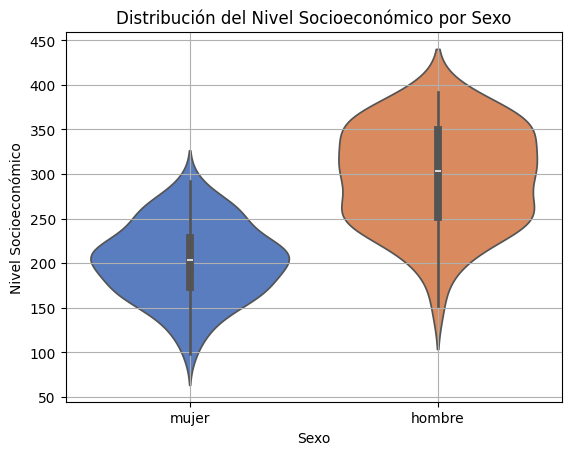

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diagrama de violín
sns.violinplot(x='categoria', y='nse_score', data=nse, palette='muted', legend=True)

# Añadir título y etiquetas
plt.title('Distribución del Nivel Socioeconómico por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Nivel Socioeconómico')
plt.grid(True)
# Mostrar el gráfico
plt.show()

Creamos variables dummies

In [103]:
nse_dummies = pd.get_dummies(nse[['nse_score', 'categoria']])

nse_dummies.head()

,nse_score,categoria_hombre,categoria_mujer
0,266,False,True
1,152,False,True
2,224,False,True
3,216,False,True
4,240,False,True


Proponemos un modelo:

$$\text{nse} = \beta_{0} + \beta_{1} \cdot \text{mujer}$$

Por regla general, cuando hacemos un análisis ANOVA con regresión lineal, el número de variables que introducimos al modelo de $p-1$, donde $p$ es el número de variables que tenemos.

In [105]:
nse_dummies['categoria_mujer'].apply(int)

,categoria_mujer
0,1
1,1
2,1
3,1
4,1
...,...
138,0
139,0
140,0
141,0


In [106]:
X = nse_dummies['categoria_mujer'].apply(int)
X = sm.add_constant(X)

y = nse_dummies['nse_score']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              nse_score   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.33e-22
Time:                        02:01:28   Log-Likelihood:                -755.44
No. Observations:                 143   AIC:                             1515.
Df Residuals:                     141   BIC:                             1521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             297.3065      6.094     

In [107]:
nse_promedio = lambda x: results.params[0] + results.params[1] * x

print(f"NSE de mujeres: {nse_promedio(1)}")
print(f"NSE de hombres: {nse_promedio(0)}")

NSE de mujeres: 202.32098765432093
NSE de hombres: 297.3064516129032


<ipython-input-107-e19cec6e0cf6>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nse_promedio = lambda x: results.params[0] + results.params[1] * x



$$\text{nse} = \beta_{0} + \beta_{1} \cdot \text{mujer}$$

¿Qué nos está diciendo el p-value?  
R: que la variable dummie y la constante ambas son estadisticamente significativas

¿Que pasá si utilizamos las dos variables *dummies*?
observemos.

In [108]:
X = pd.DataFrame(
    {
        'mujer': nse_dummies['categoria_mujer'].apply(int),
        'hombre': nse_dummies['categoria_hombre'].apply(int)
        })
X = sm.add_constant(X)

y = nse_dummies['nse_score']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              nse_score   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.33e-22
Time:                        02:03:30   Log-Likelihood:                -755.44
No. Observations:                 143   AIC:                             1515.
Df Residuals:                     141   BIC:                             1521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.5425      2.699     61.705      0.0

Como podemos ver en la nota dos "tenemos problemas de multicolinealidad".

**Análisis Conjoin**

Es un modelo basado en la utilidad esperada.

$$U(X) = \beta_{1} \cdot x_{1} + \beta_{2} \cdot x_{2} + \cdots + \beta_{p} \cdot x_{p}$$

donde cada $U(X)$ es la utilidad esperada de un un bien con características $x_{1}, \ldots, x_{p}$.

Otros elementos que tenemos  es la importancia de uno de los atributos (características de un bien)

Dada una base de datos de diferentes características de celulares, tenemos las siguientes variables.

 - brand_name: El nombre de la marca que fabrica el teléfono.
 - model_name: El nombre del modelo del teléfono.
 - os: El sistema operativo del teléfono.
 - popularity: La popularidad del teléfono en el rango 1-1224. 1224 es el más popular y 1 es el menos popular.
 - best_price: El mejor precio del rango de precios en grivnas ucranianas (UAH).
 - lowest_price: El precio más bajo del rango de precios en grivnas ucranianas (UAH).
 - highest_price: El precio más alto del rango de precios en grivnas ucranianas (UAH).
 - seller_amount: La cantidad de vendedores que venden este teléfono.
 - screen_size: El tamaño de la pantalla del teléfono (pulgadas).
 - memory_size: El tamaño de la memoria del teléfono (GB).
 - battery_size: El tamaño de la batería del teléfono (mAh).
 - release_date: El año y el mes en que se lanzó el teléfono.






Fuente: Mobile phones data. (2021, 5 febrero). Kaggle. https://www.kaggle.com/datasets/artempozdniakov/ukrainian-market-mobile-phones-data?resource=download

Proponemos un modelo:

$$\text{popularity} = \beta_{1} \cdot \text{best_price} + \beta_{2} \cdot \text{lowest_price} + \beta_{3} \cdot \text{highest_price} + \beta_{4} \cdot \text{screen_size}$$

In [109]:
phone = pd.read_csv('sample_data/phones_data.csv', index_col=0)
phone = phone.dropna()
phone.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
5,Honor,10 6/64GB Black,Android,71,10865.0,10631.0,11099.0,2,5.8,64.0,3400.0,6-2018


Seleccionamos las variables.

In [110]:
from sklearn.preprocessing import StandardScaler

X = phone[['best_price', 'lowest_price', 'highest_price', 'screen_size']]

# Escalar datos.
scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(data=scaler.transform(X), columns=X.columns)
display(X)

scaler = StandardScaler()
scaler.fit(phone[['popularity']])
y = scaler.transform(phone[['popularity']])


,best_price,lowest_price,highest_price,screen_size
0,-0.886223,-0.888803,-0.849935,-1.693538
1,-0.874460,-0.873769,-0.792601,-1.693538
2,-0.874460,-0.873769,-0.792601,-1.693538
3,-0.874460,-0.873769,-0.792601,-1.693538
4,0.068909,0.163837,-0.055814,-0.415952
...,...,...,...,...
775,1.768366,1.380353,1.578726,0.701935
776,1.299389,0.786840,1.381907,0.701935
777,1.498743,1.471600,1.879944,0.701935
778,-0.145645,-0.140552,-0.149944,0.318659


In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   best_price     780 non-null    float64
 1   lowest_price   780 non-null    float64
 2   highest_price  780 non-null    float64
 3   screen_size    780 non-null    float64
dtypes: float64(4)
memory usage: 24.5 KB


In [112]:
X.describe()

,best_price,lowest_price,highest_price,screen_size
count,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02
mean,-8.198570e-17,-8.198570e-17,-3.643809e-17,-1.639714e-16
std,1.000642e+00,1.000642e+00,1.000642e+00,1.000642e+00
min,-9.543056e-01,-9.616622e-01,-9.149713e-01,-5.845693e+00
25%,-6.708371e-01,-6.609739e-01,-6.633853e-01,-5.756507e-01
50%,-4.447285e-01,-4.241240e-01,-4.482963e-01,2.467952e-01
75%,3.852992e-01,3.713701e-01,3.685240e-01,7.019352e-01
max,4.698617e+00,4.230994e+00,4.556597e+00,3.257107e+00


Ajustamos el modelo.


In [113]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              27.28
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                    3.32e-21
Time:                        02:11:35   Log-Likelihood:                         -1055.5
No. Observations:                 780   AIC:                                      2119.
Df Residuals:                     776   BIC:                                      2138.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Cacular la importancia de los atributos de acuerdo a la utilidad esperada.
$$R_i = max(u_{ij}) - min (u_{il})$$

Como en una de las características solo tenemos un atributo entonces normalizamos para comparar.

In [114]:
params = results.params.to_dict()
params

{'best_price': 0.8280209469022635,
 'lowest_price': -1.0578934965397218,
 'highest_price': 0.43003510551546786,
 'screen_size': 0.19534230902553296}

In [115]:
attrarray = {
  'Precio' : ['best_price','lowest_price','highest_price'],
  'Pantalla' : ['screen_size'],
}

part_worth_utility ={}
for attribute in attrarray.keys():
  print('\nAtributo:', attribute)
  temp_list = attrarray[attribute]
  for k in temp_list:
    part_worth_utility[k] =  params[k]
    print('       ',k, format(part_worth_utility[k], '.2f'))


Atributo: Precio
        best_price 0.83
        lowest_price -1.06
        highest_price 0.43

Atributo: Pantalla
        screen_size 0.20


In [116]:
partworth_range = {}
for attribute in attrarray.keys():
    temp_list = attrarray[attribute]
    temp_range = []
    for k in temp_list:
        if k in params.keys():
            temp_range.append(params[k])
    partworth_range[attribute] = temp_range
partworth_range

{'Precio': [0.8280209469022635, -1.0578934965397218, 0.43003510551546786],
 'Pantalla': [0.19534230902553296]}

In [117]:
importance = {}
relative_importance = {}

for key, v in  partworth_range.items():
  importance[key] = ( max(v) - min(v))
  if importance[key] == 0:
    importance[key] = max(v)
total_of_imp_values = sum(importance.values())
total_of_imp_values

2.0812567524675183

Importancia relativa:

$$Rimp_{i} = \frac{R_i}{\sum_{i}^{m} R_{i}}$$

In [118]:
for key,val in importance.items():
  relative_importance[key] = (100* round(val/total_of_imp_values,3))


In [119]:
print ("Importancia de las características:\n precio:",
       format(importance['Precio'],'.2f'),
       "\nPantalla:", format(importance['Pantalla'],'.2f'))

Importancia de las características:
 precio: 1.89 
Pantalla: 0.20


In [120]:
print("\nImportancia realativa:\n Precio:",
       format(relative_importance['Precio'], '.2f'), "%",\
      "\nPantalla:",format(relative_importance['Pantalla'], '.2f') , "%")



Importancia realativa:
 Precio: 90.60 % 
Pantalla: 9.40 %


Revisando la importancia de las variables.


In [121]:

df_res = pd.DataFrame({
    'param_name': results.params.keys()
    , 'param_w': results.params.values
    , 'pval': results.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

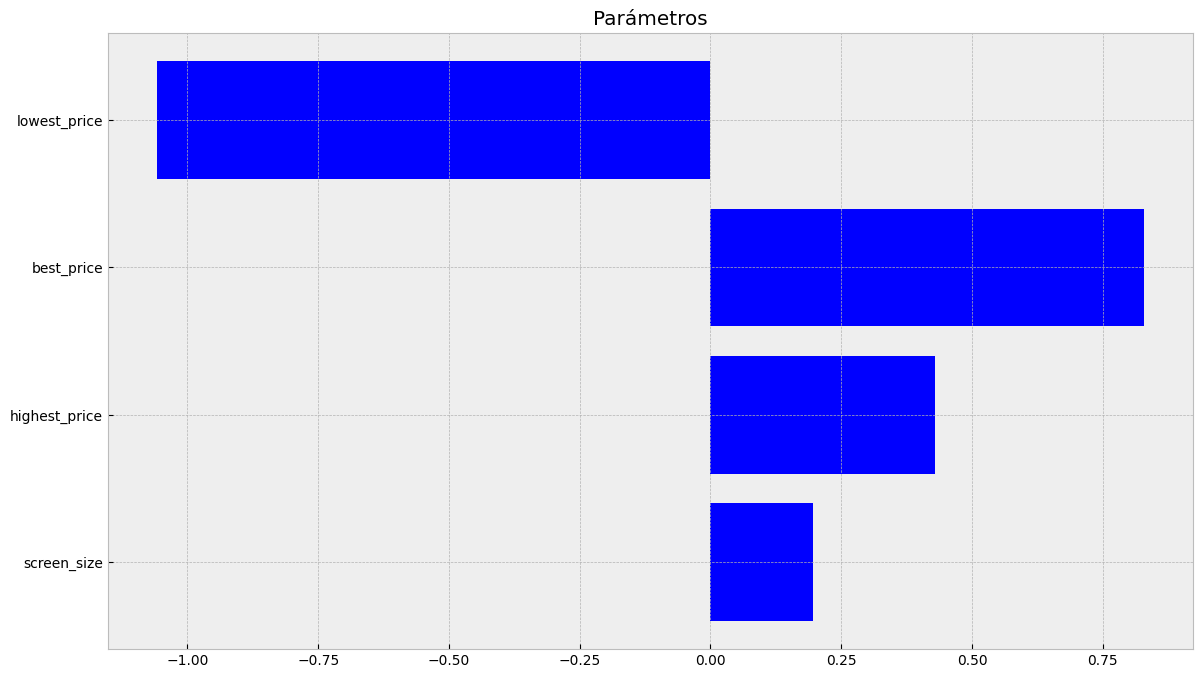

In [122]:
plt.style.use('bmh')

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Parámetros')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

 - **¿Cómo se mide la utilidad?**
 - **¿Qué pasa cuando hay heterocedasticidad en los datos?**
 R: Puede que las estimaciones sean menos precisas

**Actividad**, propon otro modelo donde consideres más variables para determinar la utilidad.

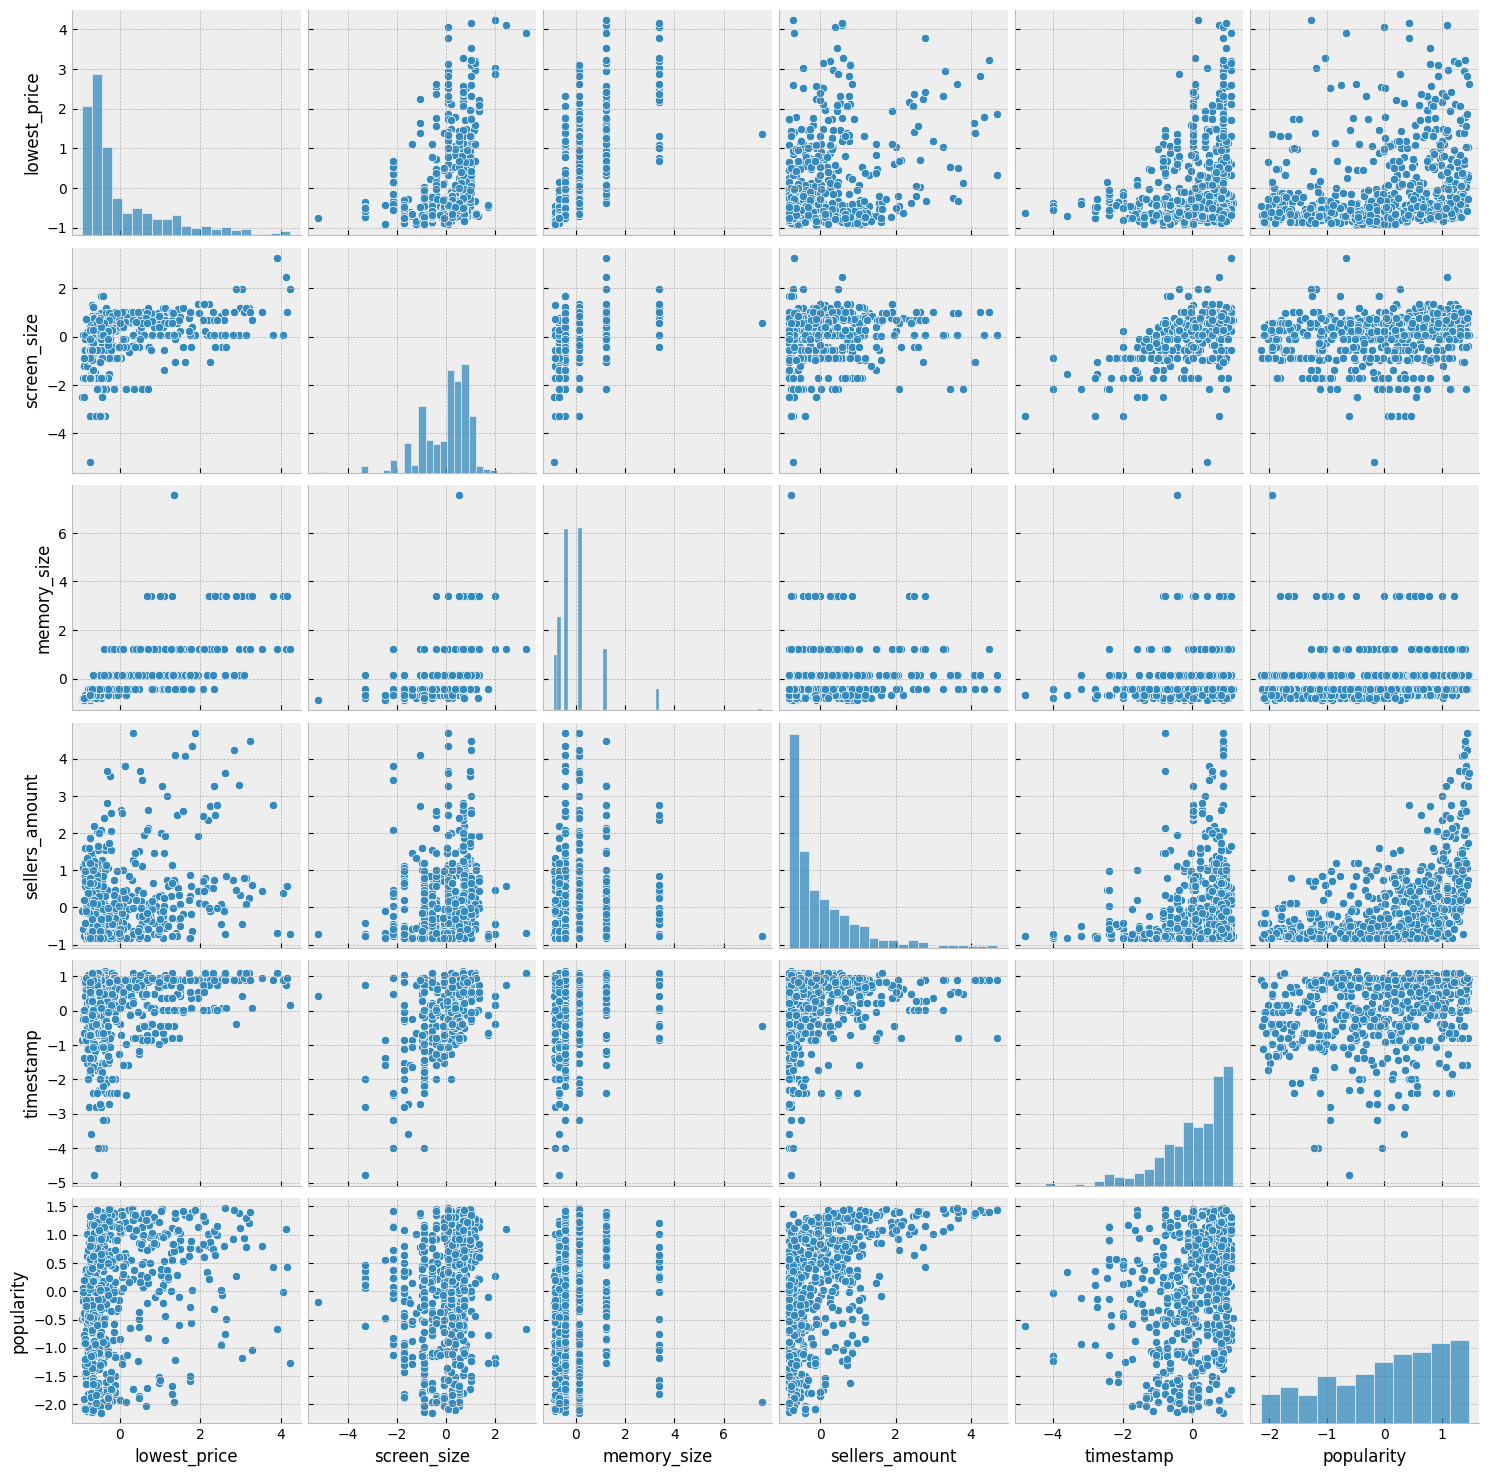

In [212]:
from matplotlib import pyplot as plt
import seaborn as sns
df = x_train.copy()
df['popularity'] = y_train
sns.pairplot(df)
plt.show()


Proponemos un modelo:

$$\text{popularity} = \beta_{1} \cdot \text{lowest_price} + \beta_{2} \cdot \text{screen_size} + \beta_{3} \cdot \text{memory_size} + \beta_{4} \cdot \text{sellers_amount} + \beta_{5} \cdot \text{timestamp}$$

In [178]:
phone2 = pd.read_csv('sample_data/phones_data.csv', index_col=0)
phone2 = phone.dropna()
phone2.head(
    3
)

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.0,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.0,16.0,2000.0,9-2020


In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from datetime import datetime

# Pasamos de fecha a timestamp
phone2['timestamp'] = phone2['release_date'].apply(lambda x: datetime.strptime(x,'%m-%Y').timestamp())

columns = ['lowest_price','screen_size','memory_size','sellers_amount','timestamp']
# Escalar datos.
scaler = StandardScaler()
X = phone2[columns]
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X, columns=columns)

# Escalamos la salida
scaler = StandardScaler()
scaler.fit(phone[['popularity']])
y = scaler.transform(phone[['popularity']])

# Dividimos en test y train los datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape

(624, 5)

In [183]:
# Creamos el modelo de Regresion lineal por minimox cuadrados ordinarios
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.294
Model:                            OLS   Adj. R-squared (uncentered):              0.288
Method:                 Least Squares   F-statistic:                              51.46
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                    1.25e-44
Time:                        03:38:03   Log-Likelihood:                         -778.28
No. Observations:                 624   AIC:                                      1567.
Df Residuals:                     619   BIC:                                      1589.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

R^2: 0.29363385009751464
MSE: 0.7093641700259741
MAE: 0.6974343269850621
RMSE: 0.8422375971339525


Text(0.5, 1.0, 'Residuos vs. Valores Predichos')

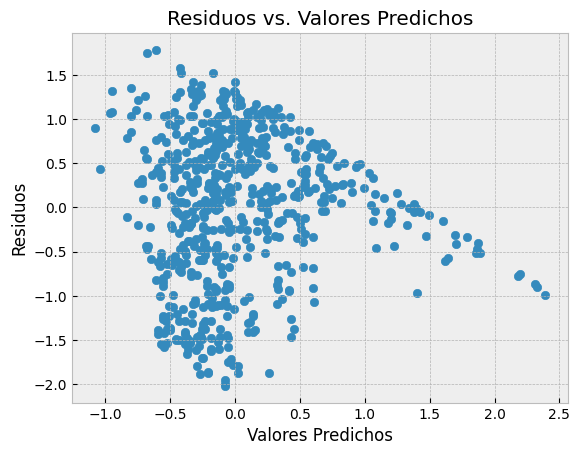

In [211]:
# Calcular métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = results.predict(x_train)
r2 = results.rsquared
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print(f'R^2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Gráfico de residuos
residuals = results.resid
plt.scatter(y_train_pred, residuals)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Predichos')

In [215]:
y_train[1], y_train_pred[1]

(array([0.51114064]), 0.10295789390243135)

In [213]:
'''                                 OLS Regression Results
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.123
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              27.28
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                    3.32e-21
Time:                        02:11:35   Log-Likelihood:                         -1055.5
No. Observations:                 780   AIC:                                      2119.
Df Residuals:                     776   BIC:                                      2138.'''

'                                 OLS Regression Results                                \n=======================================================================================\nDep. Variable:                      y   R-squared (uncentered):                   0.123\nModel:                            OLS   Adj. R-squared (uncentered):              0.119\nMethod:                 Least Squares   F-statistic:                              27.28\nDate:                Mon, 19 Aug 2024   Prob (F-statistic):                    3.32e-21\nTime:                        02:11:35   Log-Likelihood:                         -1055.5\nNo. Observations:                 780   AIC:                                      2119.\nDf Residuals:                     776   BIC:                                      2138.'

**Conclusion**   
Comparando los resultados del modelo que se realizo en clase vs el modelo que se intento encontramos una mejora en el r2 pasando de 0.123 a 0.294 y los criterios tanto bayesiano como de akaike podemos ver una mejora pasando de 2119 a 1567 para el AIC y de 2138 a 1589 para el BIC, por lo cual podemos concluir que el modelo propuesto lograr explicar de mejor manera la relacion de las variables con la salida, pero aun el R2 es muy bajo, por lo cual las predicciones pueden ser muy diferentes a los valores reales.

**Análisis estructural (test de Chow)**

El test de Chow es una prueba estadística utilizada para determinar si hay diferencias significativas entre las regresiones estimadas de dos o más grupos de datos. Es comúnmente utilizado en análisis de series temporales y en comparaciones entre subgrupos de datos.

La idea básica detrás del test de Chow es comparar la varianza de los errores de regresión dentro de los grupos con la varianza de los errores de regresión entre los grupos. Si la diferencia entre estas dos varianzas es estadísticamente significativa, entonces hay evidencia de que al menos uno de los grupos tiene una regresión diferente de los otros.

El procedimiento del test de Chow implica los siguientes pasos:

1. Dividir los datos en grupos según alguna característica relevante, como el tiempo o la pertenencia a una categoría específica.
2. Realizar regresiones separadas para cada grupo.
3. Calcular la suma de los cuadrados de los residuos (errores) de las regresiones dentro de los grupos y la suma de los cuadrados de los residuos de una regresión combinada de todos los datos.
4. Utilizar estas sumas de cuadrados para calcular la estadística de prueba del test de Chow, que sigue una distribución F bajo la hipótesis nula de que no hay diferencias significativas entre las regresiones de los grupos.
5. Comparar el valor p asociado con la estadística de prueba con un umbral predefinido de significancia estadística (como 0.05). Si el valor p es menor que este umbral, se rechaza la hipótesis nula y se concluye que hay al menos una diferencia significativa entre las regresiones de los grupos.

En resumen, el test de Chow es una herramienta útil para analizar si hay cambios estructurales en la relación entre las variables en diferentes subgrupos de datos, lo que puede ser importante para comprender cómo funcionan los fenómenos estudiados en diferentes contextos o períodos de tiempo.

Ahora realizaremos el test de Chow para el caso para la serie temporal de homicidios en México.

In [216]:
homicidios = pd.read_excel('sample_data/homicidios.xls', thousands=',')
homicidios.head()

,Año,Total,Hombre,Mujer,No especificado
0,1990,14493,12932,1519,42
1,1991,15128,13553,1534,41
2,1992,16594,14935,1623,36
3,1993,16040,14468,1553,19
4,1994,15839,14343,1476,20


In [217]:
homicidios.tail()

,Año,Total,Hombre,Mujer,No especificado
28,2018,36685,32765,3752,168
29,2019,36661,32530,3893,238
30,2020,36773,32336,3957,480
31,2021,35700,31263,4002,435
32,2022,33287,28745,3928,614


Como se puede observar, tenemos datos desde 1990 2022.
Ahora inspeccionamos un poco los datos.

In [218]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Año              33 non-null     int64
 1   Total            33 non-null     int64
 2   Hombre           33 non-null     int64
 3   Mujer            33 non-null     int64
 4   No especificado  33 non-null     int64
dtypes: int64(5)
memory usage: 1.4 KB


Obtenemos informaicón estadística de los datos.

In [219]:
homicidios.describe()

,Año,Total,Hombre,Mujer,No especificado
count,33.00000,33.000000,33.000000,33.000000,33.000000
mean,2006.00000,19386.636364,17178.939394,2105.666667,102.030303
std,9.66954,9149.107401,8080.617628,966.181067,150.376711
min,1990.00000,8867.000000,7776.000000,1083.000000,7.000000
25%,1998.00000,12249.000000,10827.000000,1370.000000,14.000000
50%,2006.00000,15839.000000,14343.000000,1534.000000,36.000000
75%,2014.00000,25757.000000,22986.000000,2693.000000,127.000000
max,2022.00000,36773.000000,32765.000000,4002.000000,614.000000


Seleccionamos nuesrtas variables.



In [229]:
X = homicidios.Año
y = homicidios.Total
X.shape

(33,)

Graficamos nuestros datos.

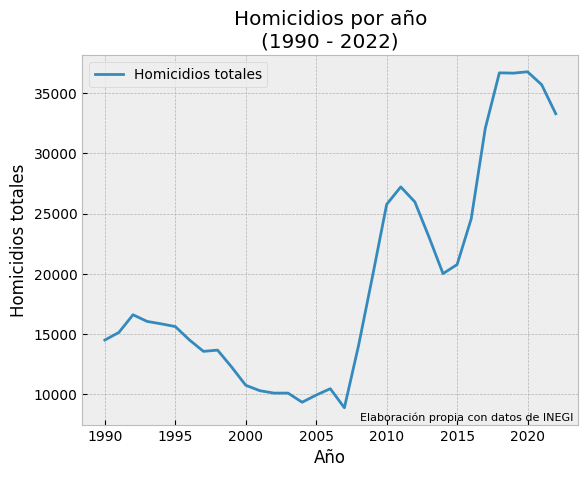

In [221]:
plt.title("Homicidios por año\n(1990 - 2022)")
plt.plot(X, y, label='Homicidios totales')
plt.ylabel("Homicidios totales")
plt.xlabel("Año")
plt.grid(True)
plt.text(0.56, 0.01, 'Elaboración propia con datos de INEGI', ha='left', va='baseline', transform=plt.gca().transAxes, fontsize=8)
plt.legend()
plt.show()

Hacemos un modelo con respecto al tiempo.


In [232]:
X = sm.add_constant(X)
x_temp = pd.DataFrame({'año': list(range(1, len(X)+1))})
x_temp = sm.add_constant(x_temp)
model = sm.OLS(y, x_temp)
results = model.fit()
print(x_temp.head())
print(results.summary())

   const  año
0    1.0    1
1    1.0    2
2    1.0    3
3    1.0    4
4    1.0    5
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     43.12
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.47e-07
Time:                        04:37:40   Log-Likelihood:                -332.94
No. Observations:                  33   AIC:                             669.9
Df Residuals:                      31   BIC:                             672.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

Proponemos un modelo.
$$\text{homicidios} = \beta_{0} + \beta_{1} \cdot \text{año} + \beta_2 \cdot \text{año}^{2}$$

In [250]:
X = sm.add_constant(X)
ano = np.array( list(range(1, len(X)+1)))
x_temp = pd.DataFrame({'año': ano, 'año**2': ano**2})
x_temp = sm.add_constant(x_temp)
print( x_temp.head())
model = sm.OLS(y, x_temp)
results = model.fit()

print(results.summary())

   const  año  año**2
0    1.0    1       1
1    1.0    2       4
2    1.0    3       9
3    1.0    4      16
4    1.0    5      25
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     76.64
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.62e-12
Time:                        04:50:02   Log-Likelihood:                -317.46
No. Observations:                  33   AIC:                             640.9
Df Residuals:                      30   BIC:                             645.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [245]:
x_temp.shape, y.shape

((33, 3), (33,))

<ipython-input-246-95a6ac3371a2>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = lambda x: results.params[0] + results.params[1] * x + results.params[2] * x**2


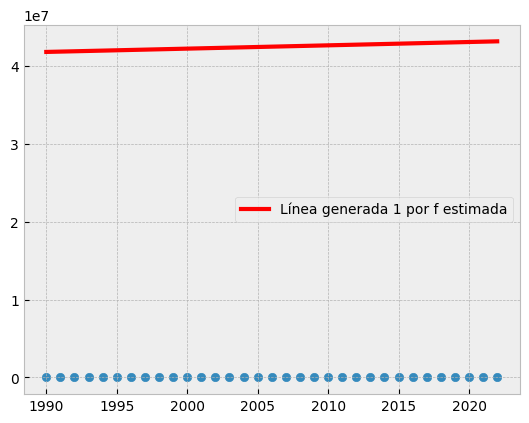

In [246]:
f = lambda x: results.params[0] + results.params[1] * x + results.params[2] * x**2
y_hat = f(x_temp)


x_values = np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), 100)
predicted_values = f(x_values)

plt.plot(x_values, predicted_values, color='red', label='Línea generada 1 por f estimada', linewidth=3)

plt.scatter(X.iloc[:, 1], y)
plt.grid(True)
plt.legend()
plt.show()

Podemos seguir probando hasta mejorar más nuestro modelo.
Una **actividad** es mejorar este modelo.

In [251]:
""""
Para lograr la actividad se agrego la columna de datos de la cantidad de asesinatos
 de mujeres y se logro conseguir un mejor modelo
   const  año  año**2  mujer
0    1.0    1       1   1519
1    1.0    2       4   1534
2    1.0    3       9   1623
3    1.0    4      16   1553
4    1.0    5      25   1476
                            OLS Regression Results
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     572.7
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           6.79e-26
Time:                        04:49:50   Log-Likelihood:                -279.70
No. Observations:                  33   AIC:                             567.4
Df Residuals:                      29   BIC:                             573.4
Df Model:                           3
"""

'"\nPara lograr la actividad se agrego la columna de datos de la cantidad de asesinatos\n de mujeres y se logro conseguir un mejor modelo \n   const  año  año**2  mujer\n0    1.0    1       1   1519\n1    1.0    2       4   1534\n2    1.0    3       9   1623\n3    1.0    4      16   1553\n4    1.0    5      25   1476\n                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                  Total   R-squared:                       0.983\nModel:                            OLS   Adj. R-squared:                  0.982\nMethod:                 Least Squares   F-statistic:                     572.7\nDate:                Mon, 19 Aug 2024   Prob (F-statistic):           6.79e-26\nTime:                        04:49:50   Log-Likelihood:                -279.70\nNo. Observations:                  33   AIC:                             567.4\nDf Residuals:                      29   

Antes de aplicar el teste de Chow, tenemos que saber si hay homocedasticidad en los datos. Para ello aplicamos el teste de **Breusch-Pagan** con el primer modelo que realizamos.

In [252]:
X = sm.add_constant(X)
x_temp = pd.DataFrame({'año': list(range(1, len(X)+1))})
x_temp = sm.add_constant(x_temp)
model = sm.OLS(y, x_temp)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     43.12
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.47e-07
Time:                        04:52:14   Log-Likelihood:                -332.94
No. Observations:                  33   AIC:                             669.9
Df Residuals:                      31   BIC:                             672.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7118.1364   2141.457      3.324      0.0

In [253]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Obtener los residuos
residuals = results.resid
_, p_value, *_ = het_breuschpagan(residuals, X)
print(f'p-value: {p_value:.4f}')

p-value: 0.9193


**Aplicando el test de Chow**

Se utiliza el siguiente repositorio:

https://github.com/jtloong/chow_test

In [254]:
! git clone https://github.com/jtloong/chow-test.git


Cloning into 'chow-test'...
remote: Enumerating objects: 108, done.
remote: Total 108 (delta 0), reused 0 (delta 0), pack-reused 108 (from 1)
Receiving objects: 100% (108/108), 24.47 KiB | 1.63 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [255]:
%cd chow-test
! pip install .

/content/chow-test
Processing /content/chow-test
  Preparing metadata (setup.py) ... done
  Created wheel for chow_test: filename=chow_test-1.0-py3-none-any.whl size=1970 sha256=914d46394aa2f93fa01fd0c239b73dd3c9cc7a0eae524567fe9c80dc9f9d5435
  Stored in directory: /root/.cache/pip/wheels/1d/25/dd/4b93f847171886298ecae12654c37c8ad8f8ad2deb9c123545
Successfully built chow_test


In [256]:
import chow_test

Ahora creamos un punto de quiebre donde creemos que el punto esta en 2008, (¿por qué elegir ese punto?)  
R: porque se ve un crecimiento muy grande de homicidios apartir de ese año



In [258]:
break_point = 2008
p_1 = homicidios[(homicidios['Año'] >= 1990) & (homicidios['Año'] <= break_point)]

Reviso los ultimos datos del DataFrame para asegurarme de que se hayan seleccionado adecuadamente.

In [259]:
p_1.tail()

,Año,Total,Hombre,Mujer,No especificado
14,2004,9329,8115,1206,8
15,2005,9921,8610,1297,14
16,2006,10452,9143,1298,11
17,2007,8867,7776,1083,8
18,2008,14006,12574,1425,7


In [260]:
p_2 = homicidios[(homicidios['Año'] > break_point) & (homicidios['Año'] <= 2022)]

Reviso los ultimos datos del DataFrame para asegurarme de que se hayan seleccionado adecuadamente.

In [261]:
p_2.head()

,Año,Total,Hombre,Mujer,No especificado
19,2009,19803,17838,1925,40
20,2010,25757,23285,2418,54
21,2011,27213,24257,2693,263
22,2012,25967,22986,2764,217
23,2013,23063,20280,2648,135


In [262]:
p_2.tail()

,Año,Total,Hombre,Mujer,No especificado
28,2018,36685,32765,3752,168
29,2019,36661,32530,3893,238
30,2020,36773,32336,3957,480
31,2021,35700,31263,4002,435
32,2022,33287,28745,3928,614


Seleccionamos nuestros dos conjuntos de datos sobre los cuales se hará el test de chow.

In [263]:
# Primer conjunto de datos.
x1 = p_1.Año.values
y1 = p_1.Total.values

# Segundo conjunto de datos.
x2 = p_2.Año.values
y2 = p_2.Total.values

Se aplica ahora el test de chow.

In [264]:
chow_test.p_value(y1, x1, y2, x2)

8.44561679177715e-10

Al tener un p value bajo, podemos decir que existe un cambio estructural a partir de 2010, porque los errores son significativamente distintos.

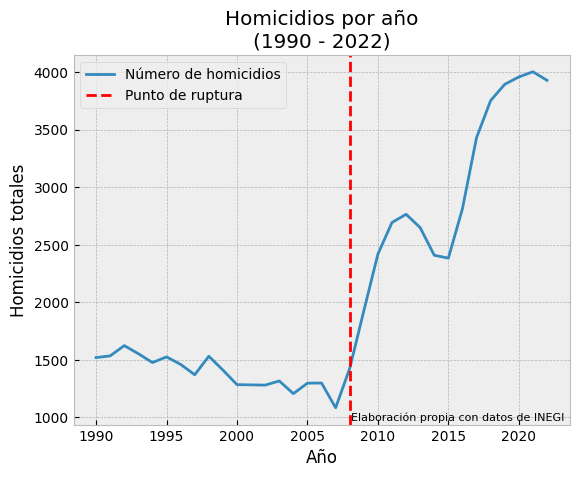

In [265]:
X = homicidios.Año.values
y = homicidios.Mujer.values
plt.title("Homicidios por año\n(1990 - 2022)")
plt.plot(X, y, label='Número de homicidios')
plt.ylabel("Homicidios totales")
plt.axvline(x=break_point, color='red', linestyle='--', label='Punto de ruptura')
plt.legend()
plt.xlabel("Año")
plt.grid(True)
plt.text(0.56, 0.01, 'Elaboración propia con datos de INEGI', ha='left', va='baseline', transform=plt.gca().transAxes, fontsize=8)
plt.show()

**Actividad**

Probar el test de chow pero en diferentes puntos.

In [276]:
breakpoint = 2015
p_1 = homicidios[(homicidios['Año'] >= 1990) & (homicidios['Año'] <= break_point)]
p_2 = homicidios[(homicidios['Año'] > break_point) & (homicidios['Año'] <= 2022)]

In [277]:
# Primer conjunto de datos.
x1 = p_1.Año.values
y1 = p_1.Total.values

# Segundo conjunto de datos.
x2 = p_2.Año.values
y2 = p_2.Total.values

chow_test.p_value(y1, x1, y2, x2)

8.44561679177715e-10

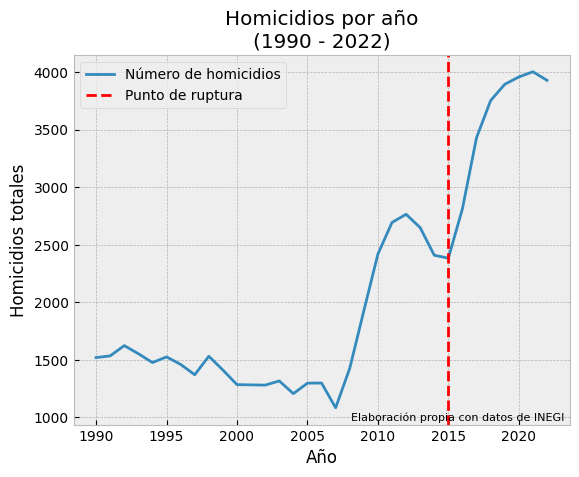

In [278]:
X = homicidios.Año.values
y = homicidios.Mujer.values
plt.title("Homicidios por año\n(1990 - 2022)")
plt.plot(X, y, label='Número de homicidios')
plt.ylabel("Homicidios totales")
plt.axvline(x=breakpoint, color='red', linestyle='--', label='Punto de ruptura')
plt.legend()
plt.xlabel("Año")
plt.grid(True)
plt.text(0.56, 0.01, 'Elaboración propia con datos de INEGI', ha='left', va='baseline', transform=plt.gca().transAxes, fontsize=8)
plt.show()

In [279]:
breakpoint = 1995
p_1 = homicidios[(homicidios['Año'] >= 1990) & (homicidios['Año'] <= break_point)]
p_2 = homicidios[(homicidios['Año'] > break_point) & (homicidios['Año'] <= 2022)]

In [280]:
# Primer conjunto de datos.
x1 = p_1.Año.values
y1 = p_1.Total.values

# Segundo conjunto de datos.
x2 = p_2.Año.values
y2 = p_2.Total.values

chow_test.p_value(y1, x1, y2, x2)

8.44561679177715e-10

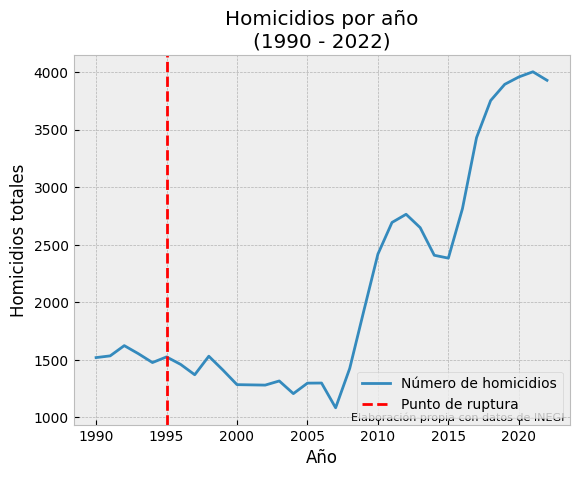

In [281]:
X = homicidios.Año.values
y = homicidios.Mujer.values
plt.title("Homicidios por año\n(1990 - 2022)")
plt.plot(X, y, label='Número de homicidios')
plt.ylabel("Homicidios totales")
plt.axvline(x=breakpoint, color='red', linestyle='--', label='Punto de ruptura')
plt.legend()
plt.xlabel("Año")
plt.grid(True)
plt.text(0.56, 0.01, 'Elaboración propia con datos de INEGI', ha='left', va='baseline', transform=plt.gca().transAxes, fontsize=8)
plt.show()

Referencias:

 - Gujarati, D. N. (2009). Econometría (5ª ed.). McGraw-Hill.
 - Srimugunthan. (2023, 23 junio). Conjoint Analysis: A Powerful Tool for Product Pricing. Medium. https://medium.com/data-analytics-ai-product-management/conjoint-analysis-a-powerful-tool-for-product-pricing-34278b3ec0f9
 - How to Do Conjoint Analysis in python. (2018, 4 diciembre). Arie Pratama Sutiono. https://ariepratama.github.io/How-to-do-conjoint-analysis-in-python/
 - ChatGPT